In [1]:
import retro
import time
import numpy as np
from gym import Env
from gym.spaces import MultiBinary, Box, Dict
import cv2
from matplotlib import pyplot as plt
import os
import optuna
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_checker import check_env

In [2]:
!python -m retro.import ./custom_integrations

Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 1 games


In [3]:
class SF2(Env):
    def __init__(self, Render):
        super().__init__()
        self.observation_space = Box(low=0,high=255,shape=(128,128,1), dtype=np.uint8)
        self.action_space = MultiBinary(6)
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
        self.Render = Render
    def step(self, action):
        obs, reward, done, info = self.doMove(action, self.Render)
        obs = self.preprocess(obs)
        damageTaken = (self.oldSelfHealth - info['health']) * 0.1
        damageDealt = self.oldOppHealth - info['enemy_health']
        if info['health'] == 176:
               damageTaken = 0
        if info['enemy_health'] == 176:
               damageDealt = 0
        reward = damageDealt - damageTaken
        if info['enemy_health'] < 0 or info['health'] < 0:
               while info['enemy_health'] != 176 or info['health']!=176:
                        testObs, testReward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                        if done:
                              return obs,reward,done,info
                        if self.Render:
                            self.render()
                            time.sleep(0.01)
        self.oldSelfHealth = info['health']
        self.oldOppHealth = info['enemy_health']
        return obs, reward, done, info
    def render(self, *args, **kwargs):
        self.game.render()
    def reset(self):
        obs = self.game.reset()
        obs = self.preprocess(obs)
        self.oldSelfHealth = 176
        self.oldOppHealth = 176
        return obs
    def preprocess(self, observation):
        cropped = observation[30:180, 10:240]
        gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (128,128), interpolation=cv2.INTER_CUBIC)
        channels = np.reshape(resize, (128,128,1))
        return channels
    def close(self):
        self.game.close()
    def doMove(self, action, render):
        if render:
            self.render()
            time.sleep(0.01)
        if np.all(action[1:6] == [0,0,0,0,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,0,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,1,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,1,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,0,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,0,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,1,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,1,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(22):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(34):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(19):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,0,0]):
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(30):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(31):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(14):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(37):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,0,1]):
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,1,0]):
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(18):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(34):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(44):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(44):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(55):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(55):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(66):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(66):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(35):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(35):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(47):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(47):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(59):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(59):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
env = SF2(False)

In [12]:
env.close()

NameError: name 'env' is not defined

In [6]:
obs = env.reset()
done = False
for game in range(1):
    while not done:
        if done:
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        print(reward)


c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
-4.4
0.0
-7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.4
0.0
0.0
0.0
0.0
-5.0
0.0
0.0
0.0
0.0
-6.6000000000000005
0.0
0.0
-4.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
36
0
0
0
0
0
0
0
0
-6.2
0.0
40.0
0.0
0.0
0.0
29.0
0.0
0.0
0.0
-8.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-5.6000000000000005
29.0
0.0
-6.2
0.0
0.0
0.0
-4.800000000000001
0.0
-5.6000000000000005


In [117]:
obs = env.reset()

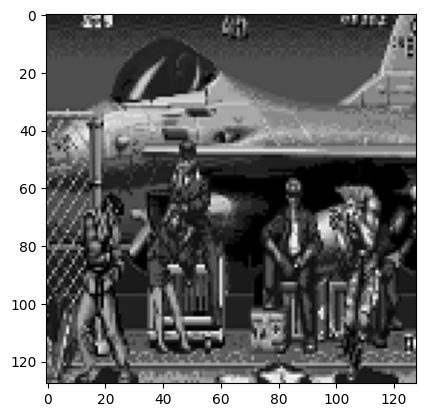

In [185]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

In [4]:
LOG_DIR = './envLogs/'
OPT_DIR = './envOpt/'

In [5]:
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [6]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [7]:
def optimize_agent(trial):
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = SF2(False)
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        #model.learn(total_timesteps=30000)
        model.learn(total_timesteps=50000, progress_bar=True)
        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()
        
        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

In [194]:
env.close()

In [8]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)

[I 2024-04-19 19:30:30,543] A new study created in memory with name: no-name-5c644014-6363-4e1e-9a48-682fe30d5f4f
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  after removing the cwd from sys.path.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  """
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

Output()

[I 2024-04-19 19:48:55,274] Trial 0 finished with value: 69.6 and parameters: {'n_steps': 2784, 'gamma': 0.8753719794575711, 'learning_rate': 4.482007469592394e-05, 'clip_range': 0.111754761519663, 'gae_lambda': 0.9776176763839083}. Best is trial 0 with value: 69.6.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4396`, after every 68 untruncated mini-batches, there will be a truncated mini-batch of size 44
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4396 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 20:11:07,472] Trial 1 finished with value: 277.5 and parameters: {'n_steps': 4396, 'gamma': 0.8382492587186117, 'learning_rate': 2.4902570528283626e-05, 'clip_range': 0.1183226904165019, 'gae_lambda': 0.9744826542499871}. Best is trial 1 with value: 277.5.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3654`, after every 57 untruncated mini-batches, there will be a truncated mini-batch of size 6
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3654 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 20:34:55,860] Trial 2 finished with value: 220.9 and parameters: {'n_steps': 3654, 'gamma': 0.9515714158310139, 'learning_rate': 7.561440126983967e-05, 'clip_range': 0.34936694725829553, 'gae_lambda': 0.8296139500590134}. Best is trial 1 with value: 277.5.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4309`, after every 67 untruncated mini-batches, there will be a truncated mini-batch of size 21
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4309 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 21:00:54,988] Trial 3 finished with value: 175.6 and parameters: {'n_steps': 4309, 'gamma': 0.9477948224150243, 'learning_rate': 1.039186514151623e-05, 'clip_range': 0.3849019550578274, 'gae_lambda': 0.9499943761065175}. Best is trial 1 with value: 277.5.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6675`, after every 104 untruncated mini-batches, there will be a truncated mini-batch of size 19
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6675 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 21:26:37,605] Trial 4 finished with value: 175.6 and parameters: {'n_steps': 6675, 'gamma': 0.810876119784558, 'learning_rate': 1.609087216371361e-05, 'clip_range': 0.3770717584810259, 'gae_lambda': 0.9365526981390871}. Best is trial 1 with value: 277.5.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7272`, after every 113 untruncated mini-batches, there will be a truncated mini-batch of size 40
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7272 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 21:46:36,899] Trial 5 finished with value: 486.2 and parameters: {'n_steps': 7272, 'gamma': 0.8426508016263522, 'learning_rate': 7.245431688853948e-05, 'clip_range': 0.34862651693944213, 'gae_lambda': 0.8155467823376787}. Best is trial 5 with value: 486.2.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 4941`, after every 77 untruncated mini-batches, there will be a truncated mini-batch of size 13
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=4941 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 22:13:50,703] Trial 6 finished with value: 175.6 and parameters: {'n_steps': 4941, 'gamma': 0.903536230952312, 'learning_rate': 2.6732537389369953e-05, 'clip_range': 0.38562515098558114, 'gae_lambda': 0.9072005846592546}. Best is trial 5 with value: 486.2.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7361`, after every 115 untruncated mini-batches, there will be a truncated mini-batch of size 1
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7361 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 22:34:04,919] Trial 7 finished with value: 532.1 and parameters: {'n_steps': 7361, 'gamma': 0.8494188666755272, 'learning_rate': 6.697472982954939e-05, 'clip_range': 0.3607534597549603, 'gae_lambda': 0.8749730074582768}. Best is trial 7 with value: 532.1.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 6581`, after every 102 untruncated mini-batches, there will be a truncated mini-batch of size 53
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=6581 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 22:55:41,115] Trial 8 finished with value: 175.6 and parameters: {'n_steps': 6581, 'gamma': 0.9083679782134338, 'learning_rate': 3.7484501989087636e-05, 'clip_range': 0.30549081529070643, 'gae_lambda': 0.8389314048965864}. Best is trial 7 with value: 532.1.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\stable_baselines3\ppo\ppo.py:149: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2862`, after every 44 untruncated mini-batches, there will be a truncated mini-batch of size 46
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2862 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Output()

[I 2024-04-19 23:21:42,422] Trial 9 finished with value: 175.6 and parameters: {'n_steps': 2862, 'gamma': 0.823481165898366, 'learning_rate': 1.448788886055334e-05, 'clip_range': 0.25073032052390554, 'gae_lambda': 0.9770389157039088}. Best is trial 7 with value: 532.1.


In [9]:
study.best_params

{'n_steps': 7361,
 'gamma': 0.8494188666755272,
 'learning_rate': 6.697472982954939e-05,
 'clip_range': 0.3607534597549603,
 'gae_lambda': 0.8749730074582768}

In [10]:
study.best_trial

FrozenTrial(number=7, state=TrialState.COMPLETE, values=[532.1], datetime_start=datetime.datetime(2024, 4, 19, 22, 13, 50, 705499), datetime_complete=datetime.datetime(2024, 4, 19, 22, 34, 4, 919315), params={'n_steps': 7361, 'gamma': 0.8494188666755272, 'learning_rate': 6.697472982954939e-05, 'clip_range': 0.3607534597549603, 'gae_lambda': 0.8749730074582768}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=7, value=None)

In [11]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_7_best_model.zip'))

In [12]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [13]:
CHECKPOINT_DIR = './envTrain/'

In [14]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [15]:
# Create environment 
env = SF2(False)
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [16]:
model_params = study.best_params

model_params['n_steps'] = 7424  # set n_steps to 7488 or a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 7424,
 'gamma': 0.8494188666755272,
 'learning_rate': 6.697472982954939e-05,
 'clip_range': 0.3607534597549603,
 'gae_lambda': 0.8749730074582768}

In [17]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [20]:
model.load(os.path.join(OPT_DIR, 'trial_7_best_model.zip'))

In [21]:

# Kick off training 
#model.learn(total_timesteps=100000, callback=callback)
model.learn(total_timesteps=5000000, callback=callback, progress_bar=True) 

Logging to ./envLogs/PPO_14


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 215      |
|    ep_rew_mean     | 199      |
| time/              |          |
|    fps             | 57       |
|    iterations      | 1        |
|    time_elapsed    | 129      |
|    total_timesteps | 7424     |
---------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 207        |
|    ep_rew_mean          | 205        |
| time/                   |            |
|    fps                  | 51         |
|    iterations           | 2          |
|    time_elapsed         | 287        |
|    total_timesteps      | 14848      |
| train/                  |            |
|    approx_kl            | 0.02896954 |
|    clip_fraction        | 0.0879     |
|    clip_range           | 0.361      |
|    entropy_loss         | -4.12      |
|    explained_variance   | -0.000743  |
|    learning_rate        | 6.7e-05    |
|    loss                 | 26.6       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.018     |
|    value_loss           | 75.4       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 199         |
|    ep_rew_mean          | 226         |
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 3           |
|    time_elapsed         | 456         |
|    total_timesteps      | 22272       |
| train/                  |             |
|    approx_kl            | 0.025811786 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.361       |
|    entropy_loss         | -4.06       |
|    explained_variance   | -0.0363     |
|    learning_rate        | 6.7e-05     |
|    loss                 | 26.9        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 79          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 174         |
|    ep_rew_mean          | 243         |
| time/                   |             |
|    fps                  | 46          |
|    iterations           | 4           |
|    time_elapsed         | 636         |
|    total_timesteps      | 29696       |
| train/                  |             |
|    approx_kl            | 0.032615785 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.361       |
|    entropy_loss         | -3.96       |
|    explained_variance   | -0.00106    |
|    learning_rate        | 6.7e-05     |
|    loss                 | 33.8        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0204     |
|    value_loss           | 94.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 169        |
|    ep_rew_mean          | 257        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 5          |
|    time_elapsed         | 811        |
|    total_timesteps      | 37120      |
| train/                  |            |
|    approx_kl            | 0.03381991 |
|    clip_fraction        | 0.128      |
|    clip_range           | 0.361      |
|    entropy_loss         | -3.86      |
|    explained_variance   | -0.035     |
|    learning_rate        | 6.7e-05    |
|    loss                 | 37.7       |
|    n_updates            | 40         |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 105        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 172         |
|    ep_rew_mean          | 293         |
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 6           |
|    time_elapsed         | 1004        |
|    total_timesteps      | 44544       |
| train/                  |             |
|    approx_kl            | 0.030433452 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.361       |
|    entropy_loss         | -3.82       |
|    explained_variance   | -0.0171     |
|    learning_rate        | 6.7e-05     |
|    loss                 | 64.6        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 103         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 167        |
|    ep_rew_mean          | 320        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 7          |
|    time_elapsed         | 1209       |
|    total_timesteps      | 51968      |
| train/                  |            |
|    approx_kl            | 0.03980168 |
|    clip_fraction        | 0.126      |
|    clip_range           | 0.361      |
|    entropy_loss         | -3.61      |
|    explained_variance   | -0.034     |
|    learning_rate        | 6.7e-05    |
|    loss                 | 50.7       |
|    n_updates            | 60         |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 121        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 161         |
|    ep_rew_mean          | 345         |
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 8           |
|    time_elapsed         | 1416        |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.038909625 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.361       |
|    entropy_loss         | -3.44       |
|    explained_variance   | -0.00907    |
|    learning_rate        | 6.7e-05     |
|    loss                 | 70.6        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 129         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 157         |
|    ep_rew_mean          | 355         |
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 9           |
|    time_elapsed         | 1628        |
|    total_timesteps      | 66816       |
| train/                  |             |
|    approx_kl            | 0.034469318 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.361       |
|    entropy_loss         | -3.32       |
|    explained_variance   | 0.0135      |
|    learning_rate        | 6.7e-05     |
|    loss                 | 43.4        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 128         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 163        |
|    ep_rew_mean          | 377        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 10         |
|    time_elapsed         | 1860       |
|    total_timesteps      | 74240      |
| train/                  |            |
|    approx_kl            | 0.04088819 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.361      |
|    entropy_loss         | -3.23      |
|    explained_variance   | 0.0468     |
|    learning_rate        | 6.7e-05    |
|    loss                 | 43.7       |
|    n_updates            | 90         |
|    policy_gradient_loss | -0.0164    |
|    value_loss           | 127        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 165         |
|    ep_rew_mean          | 413         |
| time/                   |             |
|    fps                  | 39          |
|    iterations           | 11          |
|    time_elapsed         | 2089        |
|    total_timesteps      | 81664       |
| train/                  |             |
|    approx_kl            | 0.059329096 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.361       |
|    entropy_loss         | -3.11       |
|    explained_variance   | 0.0521      |
|    learning_rate        | 6.7e-05     |
|    loss                 | 30.4        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00965    |
|    value_loss           | 135         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 165         |
|    ep_rew_mean          | 446         |
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 12          |
|    time_elapsed         | 2316        |
|    total_timesteps      | 89088       |
| train/                  |             |
|    approx_kl            | 0.043859996 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.93       |
|    explained_variance   | 0.137       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 29.8        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 127         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 157        |
|    ep_rew_mean          | 439        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 13         |
|    time_elapsed         | 2550       |
|    total_timesteps      | 96512      |
| train/                  |            |
|    approx_kl            | 0.04633294 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.9       |
|    explained_variance   | 0.112      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 41.8       |
|    n_updates            | 120        |
|    policy_gradient_loss | -0.00984   |
|    value_loss           | 143        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 159         |
|    ep_rew_mean          | 450         |
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 14          |
|    time_elapsed         | 2790        |
|    total_timesteps      | 103936      |
| train/                  |             |
|    approx_kl            | 0.055555347 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.81       |
|    explained_variance   | 0.151       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 46.7        |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 134         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 157        |
|    ep_rew_mean          | 466        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 15         |
|    time_elapsed         | 3021       |
|    total_timesteps      | 111360     |
| train/                  |            |
|    approx_kl            | 0.06128865 |
|    clip_fraction        | 0.191      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.71      |
|    explained_variance   | 0.128      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 55.9       |
|    n_updates            | 140        |
|    policy_gradient_loss | -0.0018    |
|    value_loss           | 144        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 149         |
|    ep_rew_mean          | 454         |
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 16          |
|    time_elapsed         | 3270        |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.060619686 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.67       |
|    explained_variance   | 0.219       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 33          |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00595    |
|    value_loss           | 141         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 148         |
|    ep_rew_mean          | 452         |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 17          |
|    time_elapsed         | 3516        |
|    total_timesteps      | 126208      |
| train/                  |             |
|    approx_kl            | 0.079481825 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.75       |
|    explained_variance   | 0.256       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 74.5        |
|    n_updates            | 160         |
|    policy_gradient_loss | 0.00703     |
|    value_loss           | 147         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 155        |
|    ep_rew_mean          | 481        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 18         |
|    time_elapsed         | 3763       |
|    total_timesteps      | 133632     |
| train/                  |            |
|    approx_kl            | 0.07158926 |
|    clip_fraction        | 0.246      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.52      |
|    explained_variance   | 0.266      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 46.6       |
|    n_updates            | 170        |
|    policy_gradient_loss | -0.00268   |
|    value_loss           | 145        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 158        |
|    ep_rew_mean          | 519        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 19         |
|    time_elapsed         | 4011       |
|    total_timesteps      | 141056     |
| train/                  |            |
|    approx_kl            | 0.08075085 |
|    clip_fraction        | 0.236      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.47      |
|    explained_variance   | 0.396      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 32.8       |
|    n_updates            | 180        |
|    policy_gradient_loss | -0.00169   |
|    value_loss           | 131        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 153         |
|    ep_rew_mean          | 517         |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 20          |
|    time_elapsed         | 4269        |
|    total_timesteps      | 148480      |
| train/                  |             |
|    approx_kl            | 0.067961745 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.39       |
|    explained_variance   | 0.433       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 70.9        |
|    n_updates            | 190         |
|    policy_gradient_loss | 0.00116     |
|    value_loss           | 146         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 153         |
|    ep_rew_mean          | 509         |
| time/                   |             |
|    fps                  | 34          |
|    iterations           | 21          |
|    time_elapsed         | 4508        |
|    total_timesteps      | 155904      |
| train/                  |             |
|    approx_kl            | 0.084451735 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.31       |
|    explained_variance   | 0.413       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 30.3        |
|    n_updates            | 200         |
|    policy_gradient_loss | 0.00289     |
|    value_loss           | 134         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 153       |
|    ep_rew_mean          | 518       |
| time/                   |           |
|    fps                  | 34        |
|    iterations           | 22        |
|    time_elapsed         | 4757      |
|    total_timesteps      | 163328    |
| train/                  |           |
|    approx_kl            | 0.0994205 |
|    clip_fraction        | 0.281     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.44     |
|    explained_variance   | 0.43      |
|    learning_rate        | 6.7e-05   |
|    loss                 | 32.9      |
|    n_updates            | 210       |
|    policy_gradient_loss | 0.00369   |
|    value_loss           | 138       |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 154        |
|    ep_rew_mean          | 526        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 23         |
|    time_elapsed         | 5010       |
|    total_timesteps      | 170752     |
| train/                  |            |
|    approx_kl            | 0.08949202 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.27      |
|    explained_variance   | 0.462      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 38.6       |
|    n_updates            | 220        |
|    policy_gradient_loss | -0.000759  |
|    value_loss           | 135        |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 157       |
|    ep_rew_mean          | 532       |
| time/                   |           |
|    fps                  | 33        |
|    iterations           | 24        |
|    time_elapsed         | 5253      |
|    total_timesteps      | 178176    |
| train/                  |           |
|    approx_kl            | 0.0912013 |
|    clip_fraction        | 0.271     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.33     |
|    explained_variance   | 0.428     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 61.7      |
|    n_updates            | 230       |
|    policy_gradient_loss | 0.00778   |
|    value_loss           | 143       |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 156       |
|    ep_rew_mean          | 540       |
| time/                   |           |
|    fps                  | 33        |
|    iterations           | 25        |
|    time_elapsed         | 5506      |
|    total_timesteps      | 185600    |
| train/                  |           |
|    approx_kl            | 0.1137852 |
|    clip_fraction        | 0.29      |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.26     |
|    explained_variance   | 0.514     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 49.5      |
|    n_updates            | 240       |
|    policy_gradient_loss | 0.00173   |
|    value_loss           | 118       |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 156        |
|    ep_rew_mean          | 539        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 26         |
|    time_elapsed         | 5749       |
|    total_timesteps      | 193024     |
| train/                  |            |
|    approx_kl            | 0.11842592 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.25      |
|    explained_variance   | 0.527      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 46.6       |
|    n_updates            | 250        |
|    policy_gradient_loss | 0.00413    |
|    value_loss           | 126        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 161        |
|    ep_rew_mean          | 543        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 27         |
|    time_elapsed         | 5982       |
|    total_timesteps      | 200448     |
| train/                  |            |
|    approx_kl            | 0.11050828 |
|    clip_fraction        | 0.29       |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.15      |
|    explained_variance   | 0.494      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 45.4       |
|    n_updates            | 260        |
|    policy_gradient_loss | 0.00923    |
|    value_loss           | 127        |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 163       |
|    ep_rew_mean          | 540       |
| time/                   |           |
|    fps                  | 33        |
|    iterations           | 28        |
|    time_elapsed         | 6219      |
|    total_timesteps      | 207872    |
| train/                  |           |
|    approx_kl            | 0.1433655 |
|    clip_fraction        | 0.301     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.13     |
|    explained_variance   | 0.51      |
|    learning_rate        | 6.7e-05   |
|    loss                 | 23.4      |
|    n_updates            | 270       |
|    policy_gradient_loss | 0.00378   |
|    value_loss           | 117       |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 173        |
|    ep_rew_mean          | 554        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 29         |
|    time_elapsed         | 6463       |
|    total_timesteps      | 215296     |
| train/                  |            |
|    approx_kl            | 0.14100859 |
|    clip_fraction        | 0.346      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.2       |
|    explained_variance   | 0.507      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 37.3       |
|    n_updates            | 280        |
|    policy_gradient_loss | 0.0121     |
|    value_loss           | 118        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 174         |
|    ep_rew_mean          | 541         |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 30          |
|    time_elapsed         | 6697        |
|    total_timesteps      | 222720      |
| train/                  |             |
|    approx_kl            | 0.124439925 |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.495       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 27.7        |
|    n_updates            | 290         |
|    policy_gradient_loss | 0.00519     |
|    value_loss           | 109         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 183         |
|    ep_rew_mean          | 557         |
| time/                   |             |
|    fps                  | 33          |
|    iterations           | 31          |
|    time_elapsed         | 6910        |
|    total_timesteps      | 230144      |
| train/                  |             |
|    approx_kl            | 0.119368404 |
|    clip_fraction        | 0.311       |
|    clip_range           | 0.361       |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.556       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 27.3        |
|    n_updates            | 300         |
|    policy_gradient_loss | 0.00124     |
|    value_loss           | 92.5        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 189       |
|    ep_rew_mean          | 556       |
| time/                   |           |
|    fps                  | 33        |
|    iterations           | 32        |
|    time_elapsed         | 7128      |
|    total_timesteps      | 237568    |
| train/                  |           |
|    approx_kl            | 0.1414123 |
|    clip_fraction        | 0.338     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.3      |
|    explained_variance   | 0.526     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 37.1      |
|    n_updates            | 310       |
|    policy_gradient_loss | 0.0103    |
|    value_loss           | 90.2      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 559        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 33         |
|    time_elapsed         | 7347       |
|    total_timesteps      | 244992     |
| train/                  |            |
|    approx_kl            | 0.13813174 |
|    clip_fraction        | 0.333      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.2       |
|    explained_variance   | 0.553      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 40.4       |
|    n_updates            | 320        |
|    policy_gradient_loss | 0.00407    |
|    value_loss           | 91.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 196        |
|    ep_rew_mean          | 558        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 34         |
|    time_elapsed         | 7575       |
|    total_timesteps      | 252416     |
| train/                  |            |
|    approx_kl            | 0.15969245 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.2       |
|    explained_variance   | 0.504      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 28.9       |
|    n_updates            | 330        |
|    policy_gradient_loss | 0.00862    |
|    value_loss           | 91.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 193        |
|    ep_rew_mean          | 559        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 35         |
|    time_elapsed         | 7802       |
|    total_timesteps      | 259840     |
| train/                  |            |
|    approx_kl            | 0.14947692 |
|    clip_fraction        | 0.353      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.2       |
|    explained_variance   | 0.548      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 22.9       |
|    n_updates            | 340        |
|    policy_gradient_loss | 0.0133     |
|    value_loss           | 81.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 194        |
|    ep_rew_mean          | 569        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 36         |
|    time_elapsed         | 8021       |
|    total_timesteps      | 267264     |
| train/                  |            |
|    approx_kl            | 0.15658192 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.14      |
|    explained_variance   | 0.594      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 25.4       |
|    n_updates            | 350        |
|    policy_gradient_loss | 0.00456    |
|    value_loss           | 83.7       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 198       |
|    ep_rew_mean          | 568       |
| time/                   |           |
|    fps                  | 33        |
|    iterations           | 37        |
|    time_elapsed         | 8238      |
|    total_timesteps      | 274688    |
| train/                  |           |
|    approx_kl            | 0.1837375 |
|    clip_fraction        | 0.365     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.15     |
|    explained_variance   | 0.512     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 17.7      |
|    n_updates            | 360       |
|    policy_gradient_loss | 0.00534   |
|    value_loss           | 90.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 217        |
|    ep_rew_mean          | 583        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 38         |
|    time_elapsed         | 8433       |
|    total_timesteps      | 282112     |
| train/                  |            |
|    approx_kl            | 0.16187768 |
|    clip_fraction        | 0.355      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.14      |
|    explained_variance   | 0.541      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.9       |
|    n_updates            | 370        |
|    policy_gradient_loss | 0.0153     |
|    value_loss           | 79.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 216        |
|    ep_rew_mean          | 576        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 39         |
|    time_elapsed         | 8644       |
|    total_timesteps      | 289536     |
| train/                  |            |
|    approx_kl            | 0.14890498 |
|    clip_fraction        | 0.338      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.19      |
|    explained_variance   | 0.55       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 34.1       |
|    n_updates            | 380        |
|    policy_gradient_loss | 0.0111     |
|    value_loss           | 70.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 572        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 40         |
|    time_elapsed         | 8811       |
|    total_timesteps      | 296960     |
| train/                  |            |
|    approx_kl            | 0.17088464 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.21      |
|    explained_variance   | 0.528      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 20.1       |
|    n_updates            | 390        |
|    policy_gradient_loss | 0.000902   |
|    value_loss           | 77.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 213        |
|    ep_rew_mean          | 522        |
| time/                   |            |
|    fps                  | 33         |
|    iterations           | 41         |
|    time_elapsed         | 8980       |
|    total_timesteps      | 304384     |
| train/                  |            |
|    approx_kl            | 0.17176376 |
|    clip_fraction        | 0.358      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.25      |
|    explained_variance   | 0.504      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 22.6       |
|    n_updates            | 400        |
|    policy_gradient_loss | 0.00897    |
|    value_loss           | 67.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 217        |
|    ep_rew_mean          | 499        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 42         |
|    time_elapsed         | 9143       |
|    total_timesteps      | 311808     |
| train/                  |            |
|    approx_kl            | 0.16149503 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.26      |
|    explained_variance   | 0.501      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 32.5       |
|    n_updates            | 410        |
|    policy_gradient_loss | 0.00213    |
|    value_loss           | 72.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 209        |
|    ep_rew_mean          | 488        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 43         |
|    time_elapsed         | 9306       |
|    total_timesteps      | 319232     |
| train/                  |            |
|    approx_kl            | 0.17387258 |
|    clip_fraction        | 0.36       |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.31      |
|    explained_variance   | 0.468      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 16         |
|    n_updates            | 420        |
|    policy_gradient_loss | -0.00193   |
|    value_loss           | 74.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 217        |
|    ep_rew_mean          | 507        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 44         |
|    time_elapsed         | 9479       |
|    total_timesteps      | 326656     |
| train/                  |            |
|    approx_kl            | 0.19754416 |
|    clip_fraction        | 0.396      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.29      |
|    explained_variance   | 0.442      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.7       |
|    n_updates            | 430        |
|    policy_gradient_loss | 0.0144     |
|    value_loss           | 72.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 222       |
|    ep_rew_mean          | 532       |
| time/                   |           |
|    fps                  | 34        |
|    iterations           | 45        |
|    time_elapsed         | 9656      |
|    total_timesteps      | 334080    |
| train/                  |           |
|    approx_kl            | 0.1759633 |
|    clip_fraction        | 0.374     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.19     |
|    explained_variance   | 0.493     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 32.2      |
|    n_updates            | 440       |
|    policy_gradient_loss | 0.0104    |
|    value_loss           | 73.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 228        |
|    ep_rew_mean          | 538        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 46         |
|    time_elapsed         | 9827       |
|    total_timesteps      | 341504     |
| train/                  |            |
|    approx_kl            | 0.19214019 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.25      |
|    explained_variance   | 0.567      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.73       |
|    n_updates            | 450        |
|    policy_gradient_loss | 0.00536    |
|    value_loss           | 61.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 533        |
| time/                   |            |
|    fps                  | 34         |
|    iterations           | 47         |
|    time_elapsed         | 10000      |
|    total_timesteps      | 348928     |
| train/                  |            |
|    approx_kl            | 0.17043337 |
|    clip_fraction        | 0.378      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.26      |
|    explained_variance   | 0.524      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 19.3       |
|    n_updates            | 460        |
|    policy_gradient_loss | 0.00562    |
|    value_loss           | 70.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 226       |
|    ep_rew_mean          | 530       |
| time/                   |           |
|    fps                  | 35        |
|    iterations           | 48        |
|    time_elapsed         | 10174     |
|    total_timesteps      | 356352    |
| train/                  |           |
|    approx_kl            | 0.1898781 |
|    clip_fraction        | 0.377     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.25     |
|    explained_variance   | 0.548     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 6.58      |
|    n_updates            | 470       |
|    policy_gradient_loss | -0.000144 |
|    value_loss           | 69.1      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 223        |
|    ep_rew_mean          | 516        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 49         |
|    time_elapsed         | 10345      |
|    total_timesteps      | 363776     |
| train/                  |            |
|    approx_kl            | 0.16222069 |
|    clip_fraction        | 0.361      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.21      |
|    explained_variance   | 0.542      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.7       |
|    n_updates            | 480        |
|    policy_gradient_loss | 0.00529    |
|    value_loss           | 67         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 221        |
|    ep_rew_mean          | 503        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 50         |
|    time_elapsed         | 10515      |
|    total_timesteps      | 371200     |
| train/                  |            |
|    approx_kl            | 0.16634496 |
|    clip_fraction        | 0.37       |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.18      |
|    explained_variance   | 0.542      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 33.6       |
|    n_updates            | 490        |
|    policy_gradient_loss | -0.0019    |
|    value_loss           | 63.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 237        |
|    ep_rew_mean          | 515        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 51         |
|    time_elapsed         | 10680      |
|    total_timesteps      | 378624     |
| train/                  |            |
|    approx_kl            | 0.16407692 |
|    clip_fraction        | 0.36       |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.24      |
|    explained_variance   | 0.56       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.48       |
|    n_updates            | 500        |
|    policy_gradient_loss | -0.00216   |
|    value_loss           | 68.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 252       |
|    ep_rew_mean          | 537       |
| time/                   |           |
|    fps                  | 35        |
|    iterations           | 52        |
|    time_elapsed         | 10840     |
|    total_timesteps      | 386048    |
| train/                  |           |
|    approx_kl            | 0.1712246 |
|    clip_fraction        | 0.348     |
|    clip_range           | 0.361     |
|    entropy_loss         | -2.1      |
|    explained_variance   | 0.577     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 5.25      |
|    n_updates            | 510       |
|    policy_gradient_loss | -0.0129   |
|    value_loss           | 54.3      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 251        |
|    ep_rew_mean          | 529        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 53         |
|    time_elapsed         | 11004      |
|    total_timesteps      | 393472     |
| train/                  |            |
|    approx_kl            | 0.14442033 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.99      |
|    explained_variance   | 0.567      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 19.6       |
|    n_updates            | 520        |
|    policy_gradient_loss | -0.00672   |
|    value_loss           | 57.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 263        |
|    ep_rew_mean          | 544        |
| time/                   |            |
|    fps                  | 35         |
|    iterations           | 54         |
|    time_elapsed         | 11164      |
|    total_timesteps      | 400896     |
| train/                  |            |
|    approx_kl            | 0.15293744 |
|    clip_fraction        | 0.334      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.09      |
|    explained_variance   | 0.517      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 10.2       |
|    n_updates            | 530        |
|    policy_gradient_loss | -0.00734   |
|    value_loss           | 56.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 249        |
|    ep_rew_mean          | 510        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 55         |
|    time_elapsed         | 11323      |
|    total_timesteps      | 408320     |
| train/                  |            |
|    approx_kl            | 0.16361484 |
|    clip_fraction        | 0.352      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.09      |
|    explained_variance   | 0.541      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.14       |
|    n_updates            | 540        |
|    policy_gradient_loss | -0.00193   |
|    value_loss           | 61.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 260        |
|    ep_rew_mean          | 521        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 56         |
|    time_elapsed         | 11480      |
|    total_timesteps      | 415744     |
| train/                  |            |
|    approx_kl            | 0.18065152 |
|    clip_fraction        | 0.367      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.15      |
|    explained_variance   | 0.531      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 46.1       |
|    n_updates            | 550        |
|    policy_gradient_loss | -0.00127   |
|    value_loss           | 56.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 249        |
|    ep_rew_mean          | 508        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 57         |
|    time_elapsed         | 11645      |
|    total_timesteps      | 423168     |
| train/                  |            |
|    approx_kl            | 0.16203782 |
|    clip_fraction        | 0.339      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2         |
|    explained_variance   | 0.539      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 16.8       |
|    n_updates            | 560        |
|    policy_gradient_loss | -0.00594   |
|    value_loss           | 50.4       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 264       |
|    ep_rew_mean          | 541       |
| time/                   |           |
|    fps                  | 36        |
|    iterations           | 58        |
|    time_elapsed         | 11808     |
|    total_timesteps      | 430592    |
| train/                  |           |
|    approx_kl            | 0.1696202 |
|    clip_fraction        | 0.334     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.98     |
|    explained_variance   | 0.487     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 14.4      |
|    n_updates            | 570       |
|    policy_gradient_loss | -0.00648  |
|    value_loss           | 58.2      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 260        |
|    ep_rew_mean          | 558        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 59         |
|    time_elapsed         | 11978      |
|    total_timesteps      | 438016     |
| train/                  |            |
|    approx_kl            | 0.15644738 |
|    clip_fraction        | 0.339      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.93      |
|    explained_variance   | 0.475      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 14.1       |
|    n_updates            | 580        |
|    policy_gradient_loss | -0.00576   |
|    value_loss           | 64.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 248       |
|    ep_rew_mean          | 551       |
| time/                   |           |
|    fps                  | 36        |
|    iterations           | 60        |
|    time_elapsed         | 12150     |
|    total_timesteps      | 445440    |
| train/                  |           |
|    approx_kl            | 0.1520243 |
|    clip_fraction        | 0.328     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.76     |
|    explained_variance   | 0.486     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 24.9      |
|    n_updates            | 590       |
|    policy_gradient_loss | 0.0014    |
|    value_loss           | 65.8      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 229        |
|    ep_rew_mean          | 542        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 61         |
|    time_elapsed         | 12328      |
|    total_timesteps      | 452864     |
| train/                  |            |
|    approx_kl            | 0.17453118 |
|    clip_fraction        | 0.353      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.515      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 30.8       |
|    n_updates            | 600        |
|    policy_gradient_loss | -0.00234   |
|    value_loss           | 66         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 231        |
|    ep_rew_mean          | 542        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 62         |
|    time_elapsed         | 12498      |
|    total_timesteps      | 460288     |
| train/                  |            |
|    approx_kl            | 0.18565968 |
|    clip_fraction        | 0.333      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.77      |
|    explained_variance   | 0.552      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 23.3       |
|    n_updates            | 610        |
|    policy_gradient_loss | -0.0086    |
|    value_loss           | 66.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 542        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 63         |
|    time_elapsed         | 12680      |
|    total_timesteps      | 467712     |
| train/                  |            |
|    approx_kl            | 0.17404434 |
|    clip_fraction        | 0.33       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.71      |
|    explained_variance   | 0.536      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11.9       |
|    n_updates            | 620        |
|    policy_gradient_loss | -0.00541   |
|    value_loss           | 62.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 225        |
|    ep_rew_mean          | 532        |
| time/                   |            |
|    fps                  | 36         |
|    iterations           | 64         |
|    time_elapsed         | 12857      |
|    total_timesteps      | 475136     |
| train/                  |            |
|    approx_kl            | 0.16094743 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.76      |
|    explained_variance   | 0.571      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.57       |
|    n_updates            | 630        |
|    policy_gradient_loss | -0.00312   |
|    value_loss           | 68.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 219        |
|    ep_rew_mean          | 530        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 65         |
|    time_elapsed         | 13028      |
|    total_timesteps      | 482560     |
| train/                  |            |
|    approx_kl            | 0.16036034 |
|    clip_fraction        | 0.336      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.75      |
|    explained_variance   | 0.589      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 19.5       |
|    n_updates            | 640        |
|    policy_gradient_loss | -0.013     |
|    value_loss           | 66         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 229        |
|    ep_rew_mean          | 550        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 66         |
|    time_elapsed         | 13204      |
|    total_timesteps      | 489984     |
| train/                  |            |
|    approx_kl            | 0.18407509 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.73      |
|    explained_variance   | 0.612      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.29       |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.0121    |
|    value_loss           | 59.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 222        |
|    ep_rew_mean          | 546        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 67         |
|    time_elapsed         | 13386      |
|    total_timesteps      | 497408     |
| train/                  |            |
|    approx_kl            | 0.18549027 |
|    clip_fraction        | 0.337      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.583      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.4       |
|    n_updates            | 660        |
|    policy_gradient_loss | -0.00867   |
|    value_loss           | 74.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 207        |
|    ep_rew_mean          | 525        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 68         |
|    time_elapsed         | 13567      |
|    total_timesteps      | 504832     |
| train/                  |            |
|    approx_kl            | 0.18105496 |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.605      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.4       |
|    n_updates            | 670        |
|    policy_gradient_loss | -0.00986   |
|    value_loss           | 72.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 197        |
|    ep_rew_mean          | 528        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 69         |
|    time_elapsed         | 13760      |
|    total_timesteps      | 512256     |
| train/                  |            |
|    approx_kl            | 0.17063126 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.7       |
|    explained_variance   | 0.621      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.38       |
|    n_updates            | 680        |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 65.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 189        |
|    ep_rew_mean          | 523        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 70         |
|    time_elapsed         | 13947      |
|    total_timesteps      | 519680     |
| train/                  |            |
|    approx_kl            | 0.16474359 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.679      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 12.2       |
|    n_updates            | 690        |
|    policy_gradient_loss | -0.012     |
|    value_loss           | 65.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 183        |
|    ep_rew_mean          | 512        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 71         |
|    time_elapsed         | 14138      |
|    total_timesteps      | 527104     |
| train/                  |            |
|    approx_kl            | 0.16759168 |
|    clip_fraction        | 0.319      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.74       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11.7       |
|    n_updates            | 700        |
|    policy_gradient_loss | -0.025     |
|    value_loss           | 58.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 185        |
|    ep_rew_mean          | 521        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 72         |
|    time_elapsed         | 14324      |
|    total_timesteps      | 534528     |
| train/                  |            |
|    approx_kl            | 0.15678845 |
|    clip_fraction        | 0.322      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.717      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.64       |
|    n_updates            | 710        |
|    policy_gradient_loss | -0.00289   |
|    value_loss           | 70.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 185        |
|    ep_rew_mean          | 519        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 73         |
|    time_elapsed         | 14510      |
|    total_timesteps      | 541952     |
| train/                  |            |
|    approx_kl            | 0.16848123 |
|    clip_fraction        | 0.32       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.51      |
|    explained_variance   | 0.731      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.72       |
|    n_updates            | 720        |
|    policy_gradient_loss | -0.0187    |
|    value_loss           | 59.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 532        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 74         |
|    time_elapsed         | 14694      |
|    total_timesteps      | 549376     |
| train/                  |            |
|    approx_kl            | 0.15470788 |
|    clip_fraction        | 0.308      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.686      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 30         |
|    n_updates            | 730        |
|    policy_gradient_loss | -0.0128    |
|    value_loss           | 72.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 198        |
|    ep_rew_mean          | 546        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 75         |
|    time_elapsed         | 14878      |
|    total_timesteps      | 556800     |
| train/                  |            |
|    approx_kl            | 0.15282206 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.695      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 17.8       |
|    n_updates            | 740        |
|    policy_gradient_loss | -0.0125    |
|    value_loss           | 61.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 204        |
|    ep_rew_mean          | 561        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 76         |
|    time_elapsed         | 15065      |
|    total_timesteps      | 564224     |
| train/                  |            |
|    approx_kl            | 0.16450998 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.741      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.8       |
|    n_updates            | 750        |
|    policy_gradient_loss | -0.0171    |
|    value_loss           | 57.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 199        |
|    ep_rew_mean          | 561        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 77         |
|    time_elapsed         | 15256      |
|    total_timesteps      | 571648     |
| train/                  |            |
|    approx_kl            | 0.16562133 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.49      |
|    explained_variance   | 0.731      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.5       |
|    n_updates            | 760        |
|    policy_gradient_loss | -0.0103    |
|    value_loss           | 58.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 182        |
|    ep_rew_mean          | 546        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 78         |
|    time_elapsed         | 15457      |
|    total_timesteps      | 579072     |
| train/                  |            |
|    approx_kl            | 0.16105704 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.74       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11.6       |
|    n_updates            | 770        |
|    policy_gradient_loss | -0.0109    |
|    value_loss           | 63         |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 180       |
|    ep_rew_mean          | 510       |
| time/                   |           |
|    fps                  | 37        |
|    iterations           | 79        |
|    time_elapsed         | 15639     |
|    total_timesteps      | 586496    |
| train/                  |           |
|    approx_kl            | 0.1780626 |
|    clip_fraction        | 0.32      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.38     |
|    explained_variance   | 0.776     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 6.41      |
|    n_updates            | 780       |
|    policy_gradient_loss | -0.00969  |
|    value_loss           | 62.3      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 190        |
|    ep_rew_mean          | 472        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 80         |
|    time_elapsed         | 15812      |
|    total_timesteps      | 593920     |
| train/                  |            |
|    approx_kl            | 0.19752388 |
|    clip_fraction        | 0.343      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.52      |
|    explained_variance   | 0.411      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.43       |
|    n_updates            | 790        |
|    policy_gradient_loss | -0.00507   |
|    value_loss           | 82.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 190        |
|    ep_rew_mean          | 463        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 81         |
|    time_elapsed         | 15997      |
|    total_timesteps      | 601344     |
| train/                  |            |
|    approx_kl            | 0.16993819 |
|    clip_fraction        | 0.36       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.363      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 53.2       |
|    n_updates            | 800        |
|    policy_gradient_loss | 0.00202    |
|    value_loss           | 77.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 191        |
|    ep_rew_mean          | 500        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 82         |
|    time_elapsed         | 16187      |
|    total_timesteps      | 608768     |
| train/                  |            |
|    approx_kl            | 0.17208458 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.618      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 24.5       |
|    n_updates            | 810        |
|    policy_gradient_loss | -0.0134    |
|    value_loss           | 69.5       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 191       |
|    ep_rew_mean          | 516       |
| time/                   |           |
|    fps                  | 37        |
|    iterations           | 83        |
|    time_elapsed         | 16370     |
|    total_timesteps      | 616192    |
| train/                  |           |
|    approx_kl            | 0.1503741 |
|    clip_fraction        | 0.325     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.43     |
|    explained_variance   | 0.701     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 15        |
|    n_updates            | 820       |
|    policy_gradient_loss | -0.00129  |
|    value_loss           | 65.7      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 193        |
|    ep_rew_mean          | 522        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 84         |
|    time_elapsed         | 16558      |
|    total_timesteps      | 623616     |
| train/                  |            |
|    approx_kl            | 0.15552197 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.713      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.02       |
|    n_updates            | 830        |
|    policy_gradient_loss | -0.00778   |
|    value_loss           | 64.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 533        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 85         |
|    time_elapsed         | 16745      |
|    total_timesteps      | 631040     |
| train/                  |            |
|    approx_kl            | 0.15618312 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.4       |
|    explained_variance   | 0.759      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 51.4       |
|    n_updates            | 840        |
|    policy_gradient_loss | -0.0197    |
|    value_loss           | 62.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 184        |
|    ep_rew_mean          | 526        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 86         |
|    time_elapsed         | 16939      |
|    total_timesteps      | 638464     |
| train/                  |            |
|    approx_kl            | 0.14318626 |
|    clip_fraction        | 0.273      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.36      |
|    explained_variance   | 0.801      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 20.2       |
|    n_updates            | 850        |
|    policy_gradient_loss | -0.0261    |
|    value_loss           | 49.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 197        |
|    ep_rew_mean          | 540        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 87         |
|    time_elapsed         | 17114      |
|    total_timesteps      | 645888     |
| train/                  |            |
|    approx_kl            | 0.13644628 |
|    clip_fraction        | 0.297      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.811      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 32.7       |
|    n_updates            | 860        |
|    policy_gradient_loss | -0.0185    |
|    value_loss           | 50.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 194        |
|    ep_rew_mean          | 520        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 88         |
|    time_elapsed         | 17291      |
|    total_timesteps      | 653312     |
| train/                  |            |
|    approx_kl            | 0.14165679 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.52      |
|    explained_variance   | 0.725      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 18.9       |
|    n_updates            | 870        |
|    policy_gradient_loss | -0.0196    |
|    value_loss           | 60.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 206        |
|    ep_rew_mean          | 524        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 89         |
|    time_elapsed         | 17467      |
|    total_timesteps      | 660736     |
| train/                  |            |
|    approx_kl            | 0.13213655 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.782      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 20.5       |
|    n_updates            | 880        |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 53.7       |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 202      |
|    ep_rew_mean          | 528      |
| time/                   |          |
|    fps                  | 37       |
|    iterations           | 90       |
|    time_elapsed         | 17646    |
|    total_timesteps      | 668160   |
| train/                  |          |
|    approx_kl            | 0.124669 |
|    clip_fraction        | 0.3      |
|    clip_range           | 0.361    |
|    entropy_loss         | -1.48    |
|    explained_variance   | 0.775    |
|    learning_rate        | 6.7e-05  |
|    loss                 | 10.8     |
|    n_updates            | 890      |
|    policy_gradient_loss | -0.0155  |
|    value_loss           | 51.5     |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 202        |
|    ep_rew_mean          | 526        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 91         |
|    time_elapsed         | 17829      |
|    total_timesteps      | 675584     |
| train/                  |            |
|    approx_kl            | 0.13052134 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.37      |
|    explained_variance   | 0.737      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 31.5       |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.0255    |
|    value_loss           | 63.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 199        |
|    ep_rew_mean          | 535        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 92         |
|    time_elapsed         | 18010      |
|    total_timesteps      | 683008     |
| train/                  |            |
|    approx_kl            | 0.13540898 |
|    clip_fraction        | 0.287      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.772      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.7       |
|    n_updates            | 910        |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 53.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 520        |
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 93         |
|    time_elapsed         | 18188      |
|    total_timesteps      | 690432     |
| train/                  |            |
|    approx_kl            | 0.12025437 |
|    clip_fraction        | 0.278      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.789      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 14.2       |
|    n_updates            | 920        |
|    policy_gradient_loss | -0.0282    |
|    value_loss           | 45.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 196        |
|    ep_rew_mean          | 512        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 94         |
|    time_elapsed         | 18363      |
|    total_timesteps      | 697856     |
| train/                  |            |
|    approx_kl            | 0.12985168 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.52      |
|    explained_variance   | 0.782      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.74       |
|    n_updates            | 930        |
|    policy_gradient_loss | -0.0191    |
|    value_loss           | 55.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 195        |
|    ep_rew_mean          | 501        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 95         |
|    time_elapsed         | 18547      |
|    total_timesteps      | 705280     |
| train/                  |            |
|    approx_kl            | 0.15656964 |
|    clip_fraction        | 0.294      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.748      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.86       |
|    n_updates            | 940        |
|    policy_gradient_loss | -0.0265    |
|    value_loss           | 57.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 191        |
|    ep_rew_mean          | 525        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 96         |
|    time_elapsed         | 18735      |
|    total_timesteps      | 712704     |
| train/                  |            |
|    approx_kl            | 0.13432951 |
|    clip_fraction        | 0.29       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.765      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.83       |
|    n_updates            | 950        |
|    policy_gradient_loss | -0.027     |
|    value_loss           | 52.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 194        |
|    ep_rew_mean          | 542        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 97         |
|    time_elapsed         | 18920      |
|    total_timesteps      | 720128     |
| train/                  |            |
|    approx_kl            | 0.14977236 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.79       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.63       |
|    n_updates            | 960        |
|    policy_gradient_loss | -0.0293    |
|    value_loss           | 49.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 202        |
|    ep_rew_mean          | 531        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 98         |
|    time_elapsed         | 19094      |
|    total_timesteps      | 727552     |
| train/                  |            |
|    approx_kl            | 0.16146669 |
|    clip_fraction        | 0.308      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.49      |
|    explained_variance   | 0.747      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.49       |
|    n_updates            | 970        |
|    policy_gradient_loss | -0.0171    |
|    value_loss           | 54.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 201        |
|    ep_rew_mean          | 497        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 99         |
|    time_elapsed         | 19272      |
|    total_timesteps      | 734976     |
| train/                  |            |
|    approx_kl            | 0.17810278 |
|    clip_fraction        | 0.334      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.593      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.87       |
|    n_updates            | 980        |
|    policy_gradient_loss | -0.00417   |
|    value_loss           | 71.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 196        |
|    ep_rew_mean          | 478        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 100        |
|    time_elapsed         | 19455      |
|    total_timesteps      | 742400     |
| train/                  |            |
|    approx_kl            | 0.15053634 |
|    clip_fraction        | 0.309      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.61      |
|    explained_variance   | 0.662      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.3       |
|    n_updates            | 990        |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 60.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 495        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 101        |
|    time_elapsed         | 19635      |
|    total_timesteps      | 749824     |
| train/                  |            |
|    approx_kl            | 0.17163827 |
|    clip_fraction        | 0.342      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.657      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 25.4       |
|    n_updates            | 1000       |
|    policy_gradient_loss | -0.0116    |
|    value_loss           | 63.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 190        |
|    ep_rew_mean          | 511        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 102        |
|    time_elapsed         | 19821      |
|    total_timesteps      | 757248     |
| train/                  |            |
|    approx_kl            | 0.17225958 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.693      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 10.9       |
|    n_updates            | 1010       |
|    policy_gradient_loss | -0.0209    |
|    value_loss           | 57.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 184        |
|    ep_rew_mean          | 524        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 103        |
|    time_elapsed         | 20013      |
|    total_timesteps      | 764672     |
| train/                  |            |
|    approx_kl            | 0.16693121 |
|    clip_fraction        | 0.336      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.56      |
|    explained_variance   | 0.69       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 70.8       |
|    n_updates            | 1020       |
|    policy_gradient_loss | -0.00966   |
|    value_loss           | 67.7       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 180       |
|    ep_rew_mean          | 532       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 104       |
|    time_elapsed         | 20205     |
|    total_timesteps      | 772096    |
| train/                  |           |
|    approx_kl            | 0.1531858 |
|    clip_fraction        | 0.314     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.56     |
|    explained_variance   | 0.798     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 23.9      |
|    n_updates            | 1030      |
|    policy_gradient_loss | -0.0174   |
|    value_loss           | 48.5      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 182       |
|    ep_rew_mean          | 540       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 105       |
|    time_elapsed         | 20393     |
|    total_timesteps      | 779520    |
| train/                  |           |
|    approx_kl            | 0.1655727 |
|    clip_fraction        | 0.326     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.6      |
|    explained_variance   | 0.808     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 8.5       |
|    n_updates            | 1040      |
|    policy_gradient_loss | -0.016    |
|    value_loss           | 50.8      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 191        |
|    ep_rew_mean          | 548        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 106        |
|    time_elapsed         | 20573      |
|    total_timesteps      | 786944     |
| train/                  |            |
|    approx_kl            | 0.18155968 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.775      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.56       |
|    n_updates            | 1050       |
|    policy_gradient_loss | -0.0183    |
|    value_loss           | 48.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 189        |
|    ep_rew_mean          | 527        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 107        |
|    time_elapsed         | 20757      |
|    total_timesteps      | 794368     |
| train/                  |            |
|    approx_kl            | 0.17713657 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.778      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.86       |
|    n_updates            | 1060       |
|    policy_gradient_loss | -0.0153    |
|    value_loss           | 43.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 184        |
|    ep_rew_mean          | 522        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 108        |
|    time_elapsed         | 20948      |
|    total_timesteps      | 801792     |
| train/                  |            |
|    approx_kl            | 0.17262563 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.799      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 25.1       |
|    n_updates            | 1070       |
|    policy_gradient_loss | -0.0234    |
|    value_loss           | 46.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 182        |
|    ep_rew_mean          | 528        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 109        |
|    time_elapsed         | 21128      |
|    total_timesteps      | 809216     |
| train/                  |            |
|    approx_kl            | 0.15328555 |
|    clip_fraction        | 0.315      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.822      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.46       |
|    n_updates            | 1080       |
|    policy_gradient_loss | -0.0209    |
|    value_loss           | 42.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 190        |
|    ep_rew_mean          | 546        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 110        |
|    time_elapsed         | 21310      |
|    total_timesteps      | 816640     |
| train/                  |            |
|    approx_kl            | 0.19108485 |
|    clip_fraction        | 0.353      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.66      |
|    explained_variance   | 0.768      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.63       |
|    n_updates            | 1090       |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 46.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 202        |
|    ep_rew_mean          | 547        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 111        |
|    time_elapsed         | 21485      |
|    total_timesteps      | 824064     |
| train/                  |            |
|    approx_kl            | 0.18506993 |
|    clip_fraction        | 0.356      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.67      |
|    explained_variance   | 0.776      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.25       |
|    n_updates            | 1100       |
|    policy_gradient_loss | -0.0103    |
|    value_loss           | 50.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 199        |
|    ep_rew_mean          | 532        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 112        |
|    time_elapsed         | 21664      |
|    total_timesteps      | 831488     |
| train/                  |            |
|    approx_kl            | 0.15961328 |
|    clip_fraction        | 0.32       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.7       |
|    explained_variance   | 0.751      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 20.1       |
|    n_updates            | 1110       |
|    policy_gradient_loss | -0.0252    |
|    value_loss           | 47.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 191        |
|    ep_rew_mean          | 516        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 113        |
|    time_elapsed         | 21846      |
|    total_timesteps      | 838912     |
| train/                  |            |
|    approx_kl            | 0.15844366 |
|    clip_fraction        | 0.333      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.69      |
|    explained_variance   | 0.768      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.6        |
|    n_updates            | 1120       |
|    policy_gradient_loss | -0.0203    |
|    value_loss           | 53.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 187        |
|    ep_rew_mean          | 517        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 114        |
|    time_elapsed         | 22025      |
|    total_timesteps      | 846336     |
| train/                  |            |
|    approx_kl            | 0.16838895 |
|    clip_fraction        | 0.354      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.71      |
|    explained_variance   | 0.787      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 12.8       |
|    n_updates            | 1130       |
|    policy_gradient_loss | -0.0122    |
|    value_loss           | 51.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 212        |
|    ep_rew_mean          | 557        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 115        |
|    time_elapsed         | 22190      |
|    total_timesteps      | 853760     |
| train/                  |            |
|    approx_kl            | 0.15297505 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.73      |
|    explained_variance   | 0.812      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 14.1       |
|    n_updates            | 1140       |
|    policy_gradient_loss | -0.03      |
|    value_loss           | 45.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 214        |
|    ep_rew_mean          | 567        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 116        |
|    time_elapsed         | 22366      |
|    total_timesteps      | 861184     |
| train/                  |            |
|    approx_kl            | 0.19224705 |
|    clip_fraction        | 0.356      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.766      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.96       |
|    n_updates            | 1150       |
|    policy_gradient_loss | -0.0144    |
|    value_loss           | 41.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 214        |
|    ep_rew_mean          | 556        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 117        |
|    time_elapsed         | 22536      |
|    total_timesteps      | 868608     |
| train/                  |            |
|    approx_kl            | 0.17125563 |
|    clip_fraction        | 0.349      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.74      |
|    explained_variance   | 0.806      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 13.3       |
|    n_updates            | 1160       |
|    policy_gradient_loss | -0.0165    |
|    value_loss           | 41.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 205       |
|    ep_rew_mean          | 535       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 118       |
|    time_elapsed         | 22702     |
|    total_timesteps      | 876032    |
| train/                  |           |
|    approx_kl            | 0.1646917 |
|    clip_fraction        | 0.353     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.8      |
|    explained_variance   | 0.771     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 3.94      |
|    n_updates            | 1170      |
|    policy_gradient_loss | -0.0152   |
|    value_loss           | 45.2      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 216        |
|    ep_rew_mean          | 539        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 119        |
|    time_elapsed         | 22868      |
|    total_timesteps      | 883456     |
| train/                  |            |
|    approx_kl            | 0.15171747 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.8       |
|    explained_variance   | 0.763      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.3        |
|    n_updates            | 1180       |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 49         |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 220       |
|    ep_rew_mean          | 531       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 120       |
|    time_elapsed         | 23030     |
|    total_timesteps      | 890880    |
| train/                  |           |
|    approx_kl            | 0.1792393 |
|    clip_fraction        | 0.342     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.72     |
|    explained_variance   | 0.738     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 22.7      |
|    n_updates            | 1190      |
|    policy_gradient_loss | -0.0236   |
|    value_loss           | 44.7      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 208        |
|    ep_rew_mean          | 527        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 121        |
|    time_elapsed         | 23205      |
|    total_timesteps      | 898304     |
| train/                  |            |
|    approx_kl            | 0.16864929 |
|    clip_fraction        | 0.343      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.73      |
|    explained_variance   | 0.747      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 18.4       |
|    n_updates            | 1200       |
|    policy_gradient_loss | -0.012     |
|    value_loss           | 53.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 191        |
|    ep_rew_mean          | 518        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 122        |
|    time_elapsed         | 23378      |
|    total_timesteps      | 905728     |
| train/                  |            |
|    approx_kl            | 0.16495629 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.68      |
|    explained_variance   | 0.839      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.02       |
|    n_updates            | 1210       |
|    policy_gradient_loss | -0.0335    |
|    value_loss           | 36.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | 536        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 123        |
|    time_elapsed         | 23548      |
|    total_timesteps      | 913152     |
| train/                  |            |
|    approx_kl            | 0.16516016 |
|    clip_fraction        | 0.313      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.69      |
|    explained_variance   | 0.839      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.08       |
|    n_updates            | 1220       |
|    policy_gradient_loss | -0.0225    |
|    value_loss           | 42.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 209        |
|    ep_rew_mean          | 553        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 124        |
|    time_elapsed         | 23725      |
|    total_timesteps      | 920576     |
| train/                  |            |
|    approx_kl            | 0.19176069 |
|    clip_fraction        | 0.343      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.68      |
|    explained_variance   | 0.801      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.73       |
|    n_updates            | 1230       |
|    policy_gradient_loss | -0.0283    |
|    value_loss           | 42.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 204        |
|    ep_rew_mean          | 552        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 125        |
|    time_elapsed         | 23904      |
|    total_timesteps      | 928000     |
| train/                  |            |
|    approx_kl            | 0.15180375 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.783      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 16.3       |
|    n_updates            | 1240       |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 49.1       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 197       |
|    ep_rew_mean          | 553       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 126       |
|    time_elapsed         | 24080     |
|    total_timesteps      | 935424    |
| train/                  |           |
|    approx_kl            | 0.1527202 |
|    clip_fraction        | 0.32      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.62     |
|    explained_variance   | 0.815     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 14.9      |
|    n_updates            | 1250      |
|    policy_gradient_loss | -0.0264   |
|    value_loss           | 41.3      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 198        |
|    ep_rew_mean          | 557        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 127        |
|    time_elapsed         | 24258      |
|    total_timesteps      | 942848     |
| train/                  |            |
|    approx_kl            | 0.18580869 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.788      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.75       |
|    n_updates            | 1260       |
|    policy_gradient_loss | -0.0309    |
|    value_loss           | 40.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 539        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 128        |
|    time_elapsed         | 24432      |
|    total_timesteps      | 950272     |
| train/                  |            |
|    approx_kl            | 0.18451634 |
|    clip_fraction        | 0.334      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.57      |
|    explained_variance   | 0.814      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.1        |
|    n_updates            | 1270       |
|    policy_gradient_loss | -0.0183    |
|    value_loss           | 43         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 192        |
|    ep_rew_mean          | 539        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 129        |
|    time_elapsed         | 24609      |
|    total_timesteps      | 957696     |
| train/                  |            |
|    approx_kl            | 0.18334357 |
|    clip_fraction        | 0.319      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.57      |
|    explained_variance   | 0.842      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 23.1       |
|    n_updates            | 1280       |
|    policy_gradient_loss | -0.03      |
|    value_loss           | 39.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 200       |
|    ep_rew_mean          | 558       |
| time/                   |           |
|    fps                  | 38        |
|    iterations           | 130       |
|    time_elapsed         | 24790     |
|    total_timesteps      | 965120    |
| train/                  |           |
|    approx_kl            | 0.1674901 |
|    clip_fraction        | 0.315     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.54     |
|    explained_variance   | 0.816     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 7.84      |
|    n_updates            | 1290      |
|    policy_gradient_loss | -0.028    |
|    value_loss           | 42.3      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 206        |
|    ep_rew_mean          | 598        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 131        |
|    time_elapsed         | 24973      |
|    total_timesteps      | 972544     |
| train/                  |            |
|    approx_kl            | 0.15907192 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.53      |
|    explained_variance   | 0.801      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 28.3       |
|    n_updates            | 1300       |
|    policy_gradient_loss | -0.0254    |
|    value_loss           | 46.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 202        |
|    ep_rew_mean          | 582        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 132        |
|    time_elapsed         | 25152      |
|    total_timesteps      | 979968     |
| train/                  |            |
|    approx_kl            | 0.16960493 |
|    clip_fraction        | 0.308      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.834      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.68       |
|    n_updates            | 1310       |
|    policy_gradient_loss | -0.0251    |
|    value_loss           | 36.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 198        |
|    ep_rew_mean          | 567        |
| time/                   |            |
|    fps                  | 38         |
|    iterations           | 133        |
|    time_elapsed         | 25330      |
|    total_timesteps      | 987392     |
| train/                  |            |
|    approx_kl            | 0.19522868 |
|    clip_fraction        | 0.348      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.79       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.56       |
|    n_updates            | 1320       |
|    policy_gradient_loss | -0.0223    |
|    value_loss           | 45.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 206        |
|    ep_rew_mean          | 572        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 134        |
|    time_elapsed         | 25505      |
|    total_timesteps      | 994816     |
| train/                  |            |
|    approx_kl            | 0.17256796 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.819      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 17.7       |
|    n_updates            | 1330       |
|    policy_gradient_loss | -0.0309    |
|    value_loss           | 40.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 208        |
|    ep_rew_mean          | 570        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 135        |
|    time_elapsed         | 25681      |
|    total_timesteps      | 1002240    |
| train/                  |            |
|    approx_kl            | 0.17130306 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.59      |
|    explained_variance   | 0.792      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.68       |
|    n_updates            | 1340       |
|    policy_gradient_loss | -0.0249    |
|    value_loss           | 43.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 210        |
|    ep_rew_mean          | 582        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 136        |
|    time_elapsed         | 25855      |
|    total_timesteps      | 1009664    |
| train/                  |            |
|    approx_kl            | 0.16642433 |
|    clip_fraction        | 0.314      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.808      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.24       |
|    n_updates            | 1350       |
|    policy_gradient_loss | -0.0265    |
|    value_loss           | 48.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 212        |
|    ep_rew_mean          | 575        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 137        |
|    time_elapsed         | 26020      |
|    total_timesteps      | 1017088    |
| train/                  |            |
|    approx_kl            | 0.18170813 |
|    clip_fraction        | 0.326      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.56      |
|    explained_variance   | 0.779      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 13.1       |
|    n_updates            | 1360       |
|    policy_gradient_loss | -0.0199    |
|    value_loss           | 50.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 223        |
|    ep_rew_mean          | 597        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 138        |
|    time_elapsed         | 26194      |
|    total_timesteps      | 1024512    |
| train/                  |            |
|    approx_kl            | 0.16650566 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.57      |
|    explained_variance   | 0.77       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 20.7       |
|    n_updates            | 1370       |
|    policy_gradient_loss | -0.0223    |
|    value_loss           | 43.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 222        |
|    ep_rew_mean          | 576        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 139        |
|    time_elapsed         | 26365      |
|    total_timesteps      | 1031936    |
| train/                  |            |
|    approx_kl            | 0.16958241 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.55      |
|    explained_variance   | 0.82       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.4        |
|    n_updates            | 1380       |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 38.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 541        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 140        |
|    time_elapsed         | 26509      |
|    total_timesteps      | 1039360    |
| train/                  |            |
|    approx_kl            | 0.15476626 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.56      |
|    explained_variance   | 0.828      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.4       |
|    n_updates            | 1390       |
|    policy_gradient_loss | -0.0236    |
|    value_loss           | 37.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 233        |
|    ep_rew_mean          | 485        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 141        |
|    time_elapsed         | 26646      |
|    total_timesteps      | 1046784    |
| train/                  |            |
|    approx_kl            | 0.17111266 |
|    clip_fraction        | 0.347      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.71      |
|    explained_variance   | 0.694      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.91       |
|    n_updates            | 1400       |
|    policy_gradient_loss | -0.0195    |
|    value_loss           | 43         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 271        |
|    ep_rew_mean          | 487        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 142        |
|    time_elapsed         | 26768      |
|    total_timesteps      | 1054208    |
| train/                  |            |
|    approx_kl            | 0.16174883 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.72      |
|    explained_variance   | 0.63       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.44       |
|    n_updates            | 1410       |
|    policy_gradient_loss | -0.0237    |
|    value_loss           | 35         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 292        |
|    ep_rew_mean          | 430        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 143        |
|    time_elapsed         | 26891      |
|    total_timesteps      | 1061632    |
| train/                  |            |
|    approx_kl            | 0.19250976 |
|    clip_fraction        | 0.372      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.74      |
|    explained_variance   | 0.176      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.52       |
|    n_updates            | 1420       |
|    policy_gradient_loss | -0.0182    |
|    value_loss           | 39.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 314        |
|    ep_rew_mean          | 435        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 144        |
|    time_elapsed         | 27015      |
|    total_timesteps      | 1069056    |
| train/                  |            |
|    approx_kl            | 0.15436716 |
|    clip_fraction        | 0.343      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.76      |
|    explained_variance   | 0.464      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 17         |
|    n_updates            | 1430       |
|    policy_gradient_loss | -0.0139    |
|    value_loss           | 39.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 323        |
|    ep_rew_mean          | 427        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 145        |
|    time_elapsed         | 27136      |
|    total_timesteps      | 1076480    |
| train/                  |            |
|    approx_kl            | 0.15667334 |
|    clip_fraction        | 0.302      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.74      |
|    explained_variance   | 0.52       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.27       |
|    n_updates            | 1440       |
|    policy_gradient_loss | -0.0366    |
|    value_loss           | 34.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 327        |
|    ep_rew_mean          | 429        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 146        |
|    time_elapsed         | 27259      |
|    total_timesteps      | 1083904    |
| train/                  |            |
|    approx_kl            | 0.13644423 |
|    clip_fraction        | 0.321      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.74      |
|    explained_variance   | 0.594      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.45       |
|    n_updates            | 1450       |
|    policy_gradient_loss | -0.02      |
|    value_loss           | 34.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 323        |
|    ep_rew_mean          | 436        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 147        |
|    time_elapsed         | 27385      |
|    total_timesteps      | 1091328    |
| train/                  |            |
|    approx_kl            | 0.15177682 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.522      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.34       |
|    n_updates            | 1460       |
|    policy_gradient_loss | -0.0281    |
|    value_loss           | 33.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 328        |
|    ep_rew_mean          | 464        |
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 148        |
|    time_elapsed         | 27513      |
|    total_timesteps      | 1098752    |
| train/                  |            |
|    approx_kl            | 0.15123732 |
|    clip_fraction        | 0.33       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.564      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.84       |
|    n_updates            | 1470       |
|    policy_gradient_loss | -0.0214    |
|    value_loss           | 33.2       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 344       |
|    ep_rew_mean          | 476       |
| time/                   |           |
|    fps                  | 40        |
|    iterations           | 149       |
|    time_elapsed         | 27634     |
|    total_timesteps      | 1106176   |
| train/                  |           |
|    approx_kl            | 0.1459314 |
|    clip_fraction        | 0.32      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.78     |
|    explained_variance   | 0.588     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 14.7      |
|    n_updates            | 1480      |
|    policy_gradient_loss | -0.0214   |
|    value_loss           | 32.6      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 344        |
|    ep_rew_mean          | 485        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 150        |
|    time_elapsed         | 27759      |
|    total_timesteps      | 1113600    |
| train/                  |            |
|    approx_kl            | 0.13710706 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.557      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.99       |
|    n_updates            | 1490       |
|    policy_gradient_loss | -0.0184    |
|    value_loss           | 32.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 342        |
|    ep_rew_mean          | 487        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 151        |
|    time_elapsed         | 27882      |
|    total_timesteps      | 1121024    |
| train/                  |            |
|    approx_kl            | 0.15487944 |
|    clip_fraction        | 0.344      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.658      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 19.7       |
|    n_updates            | 1500       |
|    policy_gradient_loss | -0.0111    |
|    value_loss           | 31         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 340        |
|    ep_rew_mean          | 475        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 152        |
|    time_elapsed         | 28004      |
|    total_timesteps      | 1128448    |
| train/                  |            |
|    approx_kl            | 0.17291524 |
|    clip_fraction        | 0.347      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.86      |
|    explained_variance   | 0.629      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.63       |
|    n_updates            | 1510       |
|    policy_gradient_loss | -0.0226    |
|    value_loss           | 27.4       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 329       |
|    ep_rew_mean          | 458       |
| time/                   |           |
|    fps                  | 40        |
|    iterations           | 153       |
|    time_elapsed         | 28125     |
|    total_timesteps      | 1135872   |
| train/                  |           |
|    approx_kl            | 0.1587245 |
|    clip_fraction        | 0.32      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.82     |
|    explained_variance   | 0.598     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 3.65      |
|    n_updates            | 1520      |
|    policy_gradient_loss | -0.0158   |
|    value_loss           | 31.8      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 338       |
|    ep_rew_mean          | 446       |
| time/                   |           |
|    fps                  | 40        |
|    iterations           | 154       |
|    time_elapsed         | 28241     |
|    total_timesteps      | 1143296   |
| train/                  |           |
|    approx_kl            | 0.1587183 |
|    clip_fraction        | 0.328     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.86     |
|    explained_variance   | 0.524     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 2.82      |
|    n_updates            | 1530      |
|    policy_gradient_loss | -0.0228   |
|    value_loss           | 33.7      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 324        |
|    ep_rew_mean          | 415        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 155        |
|    time_elapsed         | 28366      |
|    total_timesteps      | 1150720    |
| train/                  |            |
|    approx_kl            | 0.16220666 |
|    clip_fraction        | 0.342      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.169      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.29       |
|    n_updates            | 1540       |
|    policy_gradient_loss | -0.0185    |
|    value_loss           | 33.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 305        |
|    ep_rew_mean          | 386        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 156        |
|    time_elapsed         | 28495      |
|    total_timesteps      | 1158144    |
| train/                  |            |
|    approx_kl            | 0.18110584 |
|    clip_fraction        | 0.349      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.252      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.34       |
|    n_updates            | 1550       |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 42         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 298        |
|    ep_rew_mean          | 387        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 157        |
|    time_elapsed         | 28629      |
|    total_timesteps      | 1165568    |
| train/                  |            |
|    approx_kl            | 0.14721167 |
|    clip_fraction        | 0.342      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.37       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.2       |
|    n_updates            | 1560       |
|    policy_gradient_loss | -0.0177    |
|    value_loss           | 45.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 283        |
|    ep_rew_mean          | 403        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 158        |
|    time_elapsed         | 28764      |
|    total_timesteps      | 1172992    |
| train/                  |            |
|    approx_kl            | 0.16646025 |
|    clip_fraction        | 0.352      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.94      |
|    explained_variance   | 0.53       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.91       |
|    n_updates            | 1570       |
|    policy_gradient_loss | -0.016     |
|    value_loss           | 34.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 281        |
|    ep_rew_mean          | 413        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 159        |
|    time_elapsed         | 28899      |
|    total_timesteps      | 1180416    |
| train/                  |            |
|    approx_kl            | 0.15952805 |
|    clip_fraction        | 0.365      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.92      |
|    explained_variance   | 0.581      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.09       |
|    n_updates            | 1580       |
|    policy_gradient_loss | -0.00499   |
|    value_loss           | 30.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 275        |
|    ep_rew_mean          | 416        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 160        |
|    time_elapsed         | 29036      |
|    total_timesteps      | 1187840    |
| train/                  |            |
|    approx_kl            | 0.18942025 |
|    clip_fraction        | 0.371      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.92      |
|    explained_variance   | 0.531      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11.2       |
|    n_updates            | 1590       |
|    policy_gradient_loss | 0.00256    |
|    value_loss           | 38.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 262        |
|    ep_rew_mean          | 406        |
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 161        |
|    time_elapsed         | 29176      |
|    total_timesteps      | 1195264    |
| train/                  |            |
|    approx_kl            | 0.15452382 |
|    clip_fraction        | 0.341      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.97      |
|    explained_variance   | 0.601      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 16.6       |
|    n_updates            | 1600       |
|    policy_gradient_loss | -0.00767   |
|    value_loss           | 37.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 258        |
|    ep_rew_mean          | 409        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 162        |
|    time_elapsed         | 29314      |
|    total_timesteps      | 1202688    |
| train/                  |            |
|    approx_kl            | 0.19338787 |
|    clip_fraction        | 0.356      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.61       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 24.8       |
|    n_updates            | 1610       |
|    policy_gradient_loss | -0.0186    |
|    value_loss           | 38.3       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 275       |
|    ep_rew_mean          | 435       |
| time/                   |           |
|    fps                  | 41        |
|    iterations           | 163       |
|    time_elapsed         | 29446     |
|    total_timesteps      | 1210112   |
| train/                  |           |
|    approx_kl            | 0.1870785 |
|    clip_fraction        | 0.389     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.92     |
|    explained_variance   | 0.581     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 8.47      |
|    n_updates            | 1620      |
|    policy_gradient_loss | -0.00291  |
|    value_loss           | 37.1      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 282        |
|    ep_rew_mean          | 455        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 164        |
|    time_elapsed         | 29579      |
|    total_timesteps      | 1217536    |
| train/                  |            |
|    approx_kl            | 0.15597528 |
|    clip_fraction        | 0.349      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.529      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.71       |
|    n_updates            | 1630       |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 34.1       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 285       |
|    ep_rew_mean          | 467       |
| time/                   |           |
|    fps                  | 41        |
|    iterations           | 165       |
|    time_elapsed         | 29724     |
|    total_timesteps      | 1224960   |
| train/                  |           |
|    approx_kl            | 0.1490746 |
|    clip_fraction        | 0.334     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.94     |
|    explained_variance   | 0.635     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.87      |
|    n_updates            | 1640      |
|    policy_gradient_loss | -0.0203   |
|    value_loss           | 28.1      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 269        |
|    ep_rew_mean          | 460        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 166        |
|    time_elapsed         | 29872      |
|    total_timesteps      | 1232384    |
| train/                  |            |
|    approx_kl            | 0.17228462 |
|    clip_fraction        | 0.357      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.94      |
|    explained_variance   | 0.515      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3          |
|    n_updates            | 1650       |
|    policy_gradient_loss | -0.00266   |
|    value_loss           | 46.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 270        |
|    ep_rew_mean          | 467        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 167        |
|    time_elapsed         | 30011      |
|    total_timesteps      | 1239808    |
| train/                  |            |
|    approx_kl            | 0.17158988 |
|    clip_fraction        | 0.36       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.83      |
|    explained_variance   | 0.516      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.03       |
|    n_updates            | 1660       |
|    policy_gradient_loss | -0.00114   |
|    value_loss           | 44.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 257        |
|    ep_rew_mean          | 450        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 168        |
|    time_elapsed         | 30152      |
|    total_timesteps      | 1247232    |
| train/                  |            |
|    approx_kl            | 0.16439416 |
|    clip_fraction        | 0.339      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.56       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.65       |
|    n_updates            | 1670       |
|    policy_gradient_loss | -0.0173    |
|    value_loss           | 37.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 258       |
|    ep_rew_mean          | 456       |
| time/                   |           |
|    fps                  | 41        |
|    iterations           | 169       |
|    time_elapsed         | 30294     |
|    total_timesteps      | 1254656   |
| train/                  |           |
|    approx_kl            | 0.1488161 |
|    clip_fraction        | 0.371     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.92     |
|    explained_variance   | 0.642     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 3.17      |
|    n_updates            | 1680      |
|    policy_gradient_loss | -0.0035   |
|    value_loss           | 36.7      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 259        |
|    ep_rew_mean          | 446        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 170        |
|    time_elapsed         | 30435      |
|    total_timesteps      | 1262080    |
| train/                  |            |
|    approx_kl            | 0.14226726 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.95      |
|    explained_variance   | 0.642      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.32       |
|    n_updates            | 1690       |
|    policy_gradient_loss | -0.0157    |
|    value_loss           | 36.1       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 269       |
|    ep_rew_mean          | 462       |
| time/                   |           |
|    fps                  | 41        |
|    iterations           | 171       |
|    time_elapsed         | 30577     |
|    total_timesteps      | 1269504   |
| train/                  |           |
|    approx_kl            | 0.1508157 |
|    clip_fraction        | 0.32      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.97     |
|    explained_variance   | 0.661     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.77      |
|    n_updates            | 1700      |
|    policy_gradient_loss | -0.00739  |
|    value_loss           | 35.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 259        |
|    ep_rew_mean          | 450        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 172        |
|    time_elapsed         | 30719      |
|    total_timesteps      | 1276928    |
| train/                  |            |
|    approx_kl            | 0.16014889 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.614      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.76       |
|    n_updates            | 1710       |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 37.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 261       |
|    ep_rew_mean          | 441       |
| time/                   |           |
|    fps                  | 41        |
|    iterations           | 173       |
|    time_elapsed         | 30861     |
|    total_timesteps      | 1284352   |
| train/                  |           |
|    approx_kl            | 0.1649402 |
|    clip_fraction        | 0.344     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.93     |
|    explained_variance   | 0.624     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 14.6      |
|    n_updates            | 1720      |
|    policy_gradient_loss | -0.00552  |
|    value_loss           | 44        |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 256        |
|    ep_rew_mean          | 434        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 174        |
|    time_elapsed         | 31002      |
|    total_timesteps      | 1291776    |
| train/                  |            |
|    approx_kl            | 0.17319743 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.603      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.61       |
|    n_updates            | 1730       |
|    policy_gradient_loss | -0.0115    |
|    value_loss           | 36.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 265        |
|    ep_rew_mean          | 433        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 175        |
|    time_elapsed         | 31137      |
|    total_timesteps      | 1299200    |
| train/                  |            |
|    approx_kl            | 0.17458938 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.9       |
|    explained_variance   | 0.645      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.16       |
|    n_updates            | 1740       |
|    policy_gradient_loss | -0.00351   |
|    value_loss           | 33.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 278        |
|    ep_rew_mean          | 430        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 176        |
|    time_elapsed         | 31262      |
|    total_timesteps      | 1306624    |
| train/                  |            |
|    approx_kl            | 0.17361587 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.603      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11         |
|    n_updates            | 1750       |
|    policy_gradient_loss | -0.00765   |
|    value_loss           | 36.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 307        |
|    ep_rew_mean          | 440        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 177        |
|    time_elapsed         | 31380      |
|    total_timesteps      | 1314048    |
| train/                  |            |
|    approx_kl            | 0.15184385 |
|    clip_fraction        | 0.329      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.88      |
|    explained_variance   | 0.624      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.85       |
|    n_updates            | 1760       |
|    policy_gradient_loss | -0.0109    |
|    value_loss           | 25.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 312        |
|    ep_rew_mean          | 436        |
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 178        |
|    time_elapsed         | 31509      |
|    total_timesteps      | 1321472    |
| train/                  |            |
|    approx_kl            | 0.13153318 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.614      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.69       |
|    n_updates            | 1770       |
|    policy_gradient_loss | -0.0164    |
|    value_loss           | 23.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 320        |
|    ep_rew_mean          | 416        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 179        |
|    time_elapsed         | 31626      |
|    total_timesteps      | 1328896    |
| train/                  |            |
|    approx_kl            | 0.15830645 |
|    clip_fraction        | 0.337      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.65       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.62       |
|    n_updates            | 1780       |
|    policy_gradient_loss | -0.0132    |
|    value_loss           | 30         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 335        |
|    ep_rew_mean          | 423        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 180        |
|    time_elapsed         | 31743      |
|    total_timesteps      | 1336320    |
| train/                  |            |
|    approx_kl            | 0.13139549 |
|    clip_fraction        | 0.299      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.82      |
|    explained_variance   | 0.64       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.16       |
|    n_updates            | 1790       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 23.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 334        |
|    ep_rew_mean          | 423        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 181        |
|    time_elapsed         | 31859      |
|    total_timesteps      | 1343744    |
| train/                  |            |
|    approx_kl            | 0.14630814 |
|    clip_fraction        | 0.303      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.634      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.74       |
|    n_updates            | 1800       |
|    policy_gradient_loss | -0.014     |
|    value_loss           | 23.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 342        |
|    ep_rew_mean          | 420        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 182        |
|    time_elapsed         | 31976      |
|    total_timesteps      | 1351168    |
| train/                  |            |
|    approx_kl            | 0.15857732 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.93      |
|    explained_variance   | 0.545      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.07       |
|    n_updates            | 1810       |
|    policy_gradient_loss | -0.00866   |
|    value_loss           | 26.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 357        |
|    ep_rew_mean          | 427        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 184        |
|    time_elapsed         | 32213      |
|    total_timesteps      | 1366016    |
| train/                  |            |
|    approx_kl            | 0.15797183 |
|    clip_fraction        | 0.296      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.614      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.42       |
|    n_updates            | 1830       |
|    policy_gradient_loss | -0.0117    |
|    value_loss           | 26.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 354        |
|    ep_rew_mean          | 421        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 185        |
|    time_elapsed         | 32326      |
|    total_timesteps      | 1373440    |
| train/                  |            |
|    approx_kl            | 0.13924217 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.83      |
|    explained_variance   | 0.607      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 16.6       |
|    n_updates            | 1840       |
|    policy_gradient_loss | 0.00594    |
|    value_loss           | 27.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 343        |
|    ep_rew_mean          | 418        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 186        |
|    time_elapsed         | 32442      |
|    total_timesteps      | 1380864    |
| train/                  |            |
|    approx_kl            | 0.11767337 |
|    clip_fraction        | 0.262      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.645      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.93       |
|    n_updates            | 1850       |
|    policy_gradient_loss | -0.0127    |
|    value_loss           | 24.2       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 361         |
|    ep_rew_mean          | 418         |
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 187         |
|    time_elapsed         | 32547       |
|    total_timesteps      | 1388288     |
| train/                  |             |
|    approx_kl            | 0.124270335 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.67       |
|    explained_variance   | 0.64        |
|    learning_rate        | 6.7e-05     |
|    loss                 | 5.85        |
|    n_updates            | 1860        |
|    policy_gradient_loss | -0.00948    |
|    value_loss           | 24.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 368         |
|    ep_rew_mean          | 422         |
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 188         |
|    time_elapsed         | 32661       |
|    total_timesteps      | 1395712     |
| train/                  |             |
|    approx_kl            | 0.119727485 |
|    clip_fraction        | 0.252       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.579       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 9.99        |
|    n_updates            | 1870        |
|    policy_gradient_loss | -0.00693    |
|    value_loss           | 26          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 380        |
|    ep_rew_mean          | 426        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 189        |
|    time_elapsed         | 32767      |
|    total_timesteps      | 1403136    |
| train/                  |            |
|    approx_kl            | 0.13677004 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.592      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.78       |
|    n_updates            | 1880       |
|    policy_gradient_loss | -0.0174    |
|    value_loss           | 27         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 381        |
|    ep_rew_mean          | 433        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 190        |
|    time_elapsed         | 32884      |
|    total_timesteps      | 1410560    |
| train/                  |            |
|    approx_kl            | 0.12430953 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.62      |
|    explained_variance   | 0.59       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5          |
|    n_updates            | 1890       |
|    policy_gradient_loss | -0.0146    |
|    value_loss           | 25.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 396        |
|    ep_rew_mean          | 437        |
| time/                   |            |
|    fps                  | 42         |
|    iterations           | 191        |
|    time_elapsed         | 32990      |
|    total_timesteps      | 1417984    |
| train/                  |            |
|    approx_kl            | 0.14276111 |
|    clip_fraction        | 0.281      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.78      |
|    explained_variance   | 0.605      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4          |
|    n_updates            | 1900       |
|    policy_gradient_loss | -0.012     |
|    value_loss           | 28.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 366        |
|    ep_rew_mean          | 431        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 192        |
|    time_elapsed         | 33117      |
|    total_timesteps      | 1425408    |
| train/                  |            |
|    approx_kl            | 0.12362229 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.541      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.43       |
|    n_updates            | 1910       |
|    policy_gradient_loss | -0.0105    |
|    value_loss           | 22         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 385        |
|    ep_rew_mean          | 440        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 193        |
|    time_elapsed         | 33226      |
|    total_timesteps      | 1432832    |
| train/                  |            |
|    approx_kl            | 0.14495793 |
|    clip_fraction        | 0.284      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.96      |
|    explained_variance   | 0.535      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.67       |
|    n_updates            | 1920       |
|    policy_gradient_loss | -0.00668   |
|    value_loss           | 39.8       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379         |
|    ep_rew_mean          | 445         |
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 194         |
|    time_elapsed         | 33342       |
|    total_timesteps      | 1440256     |
| train/                  |             |
|    approx_kl            | 0.110977836 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.554       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 1.96        |
|    n_updates            | 1930        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 24.9        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 394        |
|    ep_rew_mean          | 445        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 195        |
|    time_elapsed         | 33445      |
|    total_timesteps      | 1447680    |
| train/                  |            |
|    approx_kl            | 0.13553204 |
|    clip_fraction        | 0.303      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.516      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.3       |
|    n_updates            | 1940       |
|    policy_gradient_loss | -0.00616   |
|    value_loss           | 34.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 391        |
|    ep_rew_mean          | 440        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 196        |
|    time_elapsed         | 33552      |
|    total_timesteps      | 1455104    |
| train/                  |            |
|    approx_kl            | 0.12740076 |
|    clip_fraction        | 0.24       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.572      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.61       |
|    n_updates            | 1950       |
|    policy_gradient_loss | -0.0266    |
|    value_loss           | 21.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 386        |
|    ep_rew_mean          | 435        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 197        |
|    time_elapsed         | 33678      |
|    total_timesteps      | 1462528    |
| train/                  |            |
|    approx_kl            | 0.12766144 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.72      |
|    explained_variance   | 0.45       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.97       |
|    n_updates            | 1960       |
|    policy_gradient_loss | -0.0206    |
|    value_loss           | 29.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 374        |
|    ep_rew_mean          | 433        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 198        |
|    time_elapsed         | 33795      |
|    total_timesteps      | 1469952    |
| train/                  |            |
|    approx_kl            | 0.16807811 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.87      |
|    explained_variance   | 0.566      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.38       |
|    n_updates            | 1970       |
|    policy_gradient_loss | -0.0115    |
|    value_loss           | 35.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 384       |
|    ep_rew_mean          | 437       |
| time/                   |           |
|    fps                  | 43        |
|    iterations           | 199       |
|    time_elapsed         | 33912     |
|    total_timesteps      | 1477376   |
| train/                  |           |
|    approx_kl            | 0.1405869 |
|    clip_fraction        | 0.305     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.93     |
|    explained_variance   | 0.3       |
|    learning_rate        | 6.7e-05   |
|    loss                 | 6.56      |
|    n_updates            | 1980      |
|    policy_gradient_loss | -0.00982  |
|    value_loss           | 34.5      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 358       |
|    ep_rew_mean          | 436       |
| time/                   |           |
|    fps                  | 43        |
|    iterations           | 200       |
|    time_elapsed         | 34035     |
|    total_timesteps      | 1484800   |
| train/                  |           |
|    approx_kl            | 0.1244857 |
|    clip_fraction        | 0.26      |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.73     |
|    explained_variance   | 0.578     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 2.34      |
|    n_updates            | 1990      |
|    policy_gradient_loss | -0.0189   |
|    value_loss           | 25.1      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 349        |
|    ep_rew_mean          | 438        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 201        |
|    time_elapsed         | 34155      |
|    total_timesteps      | 1492224    |
| train/                  |            |
|    approx_kl            | 0.15072854 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.595      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 21.2       |
|    n_updates            | 2000       |
|    policy_gradient_loss | -0.0172    |
|    value_loss           | 32.8       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 349       |
|    ep_rew_mean          | 436       |
| time/                   |           |
|    fps                  | 43        |
|    iterations           | 202       |
|    time_elapsed         | 34276     |
|    total_timesteps      | 1499648   |
| train/                  |           |
|    approx_kl            | 0.1385009 |
|    clip_fraction        | 0.294     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.81     |
|    explained_variance   | 0.573     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 2.11      |
|    n_updates            | 2010      |
|    policy_gradient_loss | -0.0178   |
|    value_loss           | 27.5      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 316       |
|    ep_rew_mean          | 424       |
| time/                   |           |
|    fps                  | 43        |
|    iterations           | 203       |
|    time_elapsed         | 34400     |
|    total_timesteps      | 1507072   |
| train/                  |           |
|    approx_kl            | 0.1322858 |
|    clip_fraction        | 0.285     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.82     |
|    explained_variance   | 0.671     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.75      |
|    n_updates            | 2020      |
|    policy_gradient_loss | -0.0117   |
|    value_loss           | 25.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 318        |
|    ep_rew_mean          | 424        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 204        |
|    time_elapsed         | 34526      |
|    total_timesteps      | 1514496    |
| train/                  |            |
|    approx_kl            | 0.16389668 |
|    clip_fraction        | 0.31       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.91      |
|    explained_variance   | 0.602      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.23       |
|    n_updates            | 2030       |
|    policy_gradient_loss | -0.0119    |
|    value_loss           | 31.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 304        |
|    ep_rew_mean          | 409        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 205        |
|    time_elapsed         | 34654      |
|    total_timesteps      | 1521920    |
| train/                  |            |
|    approx_kl            | 0.15692744 |
|    clip_fraction        | 0.318      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.93      |
|    explained_variance   | 0.573      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.14       |
|    n_updates            | 2040       |
|    policy_gradient_loss | -0.00897   |
|    value_loss           | 28.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 298        |
|    ep_rew_mean          | 412        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 206        |
|    time_elapsed         | 34780      |
|    total_timesteps      | 1529344    |
| train/                  |            |
|    approx_kl            | 0.16544554 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.07      |
|    explained_variance   | 0.543      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 12.6       |
|    n_updates            | 2050       |
|    policy_gradient_loss | -0.0075    |
|    value_loss           | 37.3       |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 295      |
|    ep_rew_mean          | 393      |
| time/                   |          |
|    fps                  | 44       |
|    iterations           | 207      |
|    time_elapsed         | 34900    |
|    total_timesteps      | 1536768  |
| train/                  |          |
|    approx_kl            | 0.181164 |
|    clip_fraction        | 0.363    |
|    clip_range           | 0.361    |
|    entropy_loss         | -2.17    |
|    explained_variance   | 0.437    |
|    learning_rate        | 6.7e-05  |
|    loss                 | 1.77     |
|    n_updates            | 2060     |
|    policy_gradient_loss | -0.017   |
|    value_loss           | 37       |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 280        |
|    ep_rew_mean          | 357        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 208        |
|    time_elapsed         | 35021      |
|    total_timesteps      | 1544192    |
| train/                  |            |
|    approx_kl            | 0.15615425 |
|    clip_fraction        | 0.332      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.09      |
|    explained_variance   | 0.569      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.63       |
|    n_updates            | 2070       |
|    policy_gradient_loss | -0.00631   |
|    value_loss           | 29         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 292        |
|    ep_rew_mean          | 358        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 209        |
|    time_elapsed         | 35138      |
|    total_timesteps      | 1551616    |
| train/                  |            |
|    approx_kl            | 0.14385037 |
|    clip_fraction        | 0.329      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.09      |
|    explained_variance   | 0.457      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.74       |
|    n_updates            | 2080       |
|    policy_gradient_loss | 0.000197   |
|    value_loss           | 33.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 288        |
|    ep_rew_mean          | 347        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 210        |
|    time_elapsed         | 35259      |
|    total_timesteps      | 1559040    |
| train/                  |            |
|    approx_kl            | 0.13009351 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.96      |
|    explained_variance   | 0.503      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.18       |
|    n_updates            | 2090       |
|    policy_gradient_loss | -0.0154    |
|    value_loss           | 30.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 285        |
|    ep_rew_mean          | 352        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 211        |
|    time_elapsed         | 35387      |
|    total_timesteps      | 1566464    |
| train/                  |            |
|    approx_kl            | 0.18165624 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.1       |
|    explained_variance   | 0.55       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.65       |
|    n_updates            | 2100       |
|    policy_gradient_loss | -0.0284    |
|    value_loss           | 26.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 290        |
|    ep_rew_mean          | 367        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 212        |
|    time_elapsed         | 35507      |
|    total_timesteps      | 1573888    |
| train/                  |            |
|    approx_kl            | 0.16100763 |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.25      |
|    explained_variance   | 0.578      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.13       |
|    n_updates            | 2110       |
|    policy_gradient_loss | -0.0162    |
|    value_loss           | 33         |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 288       |
|    ep_rew_mean          | 372       |
| time/                   |           |
|    fps                  | 44        |
|    iterations           | 213       |
|    time_elapsed         | 35632     |
|    total_timesteps      | 1581312   |
| train/                  |           |
|    approx_kl            | 0.1382462 |
|    clip_fraction        | 0.295     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.94     |
|    explained_variance   | 0.628     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.53      |
|    n_updates            | 2120      |
|    policy_gradient_loss | -0.0245   |
|    value_loss           | 24.3      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 280       |
|    ep_rew_mean          | 363       |
| time/                   |           |
|    fps                  | 44        |
|    iterations           | 214       |
|    time_elapsed         | 35757     |
|    total_timesteps      | 1588736   |
| train/                  |           |
|    approx_kl            | 0.1438731 |
|    clip_fraction        | 0.316     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.96     |
|    explained_variance   | 0.615     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 1.67      |
|    n_updates            | 2130      |
|    policy_gradient_loss | -0.0182   |
|    value_loss           | 26        |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 275        |
|    ep_rew_mean          | 358        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 215        |
|    time_elapsed         | 35885      |
|    total_timesteps      | 1596160    |
| train/                  |            |
|    approx_kl            | 0.15325229 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2.08      |
|    explained_variance   | 0.598      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.76       |
|    n_updates            | 2140       |
|    policy_gradient_loss | -0.0167    |
|    value_loss           | 27.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 279        |
|    ep_rew_mean          | 370        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 216        |
|    time_elapsed         | 36012      |
|    total_timesteps      | 1603584    |
| train/                  |            |
|    approx_kl            | 0.14052108 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.96      |
|    explained_variance   | 0.619      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.41       |
|    n_updates            | 2150       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 28.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 275        |
|    ep_rew_mean          | 384        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 217        |
|    time_elapsed         | 36148      |
|    total_timesteps      | 1611008    |
| train/                  |            |
|    approx_kl            | 0.13423665 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.99      |
|    explained_variance   | 0.473      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 18.5       |
|    n_updates            | 2160       |
|    policy_gradient_loss | -0.0247    |
|    value_loss           | 35         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 276        |
|    ep_rew_mean          | 409        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 218        |
|    time_elapsed         | 36281      |
|    total_timesteps      | 1618432    |
| train/                  |            |
|    approx_kl            | 0.15055367 |
|    clip_fraction        | 0.337      |
|    clip_range           | 0.361      |
|    entropy_loss         | -2         |
|    explained_variance   | 0.588      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.36       |
|    n_updates            | 2170       |
|    policy_gradient_loss | -0.0159    |
|    value_loss           | 33.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 267        |
|    ep_rew_mean          | 415        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 219        |
|    time_elapsed         | 36420      |
|    total_timesteps      | 1625856    |
| train/                  |            |
|    approx_kl            | 0.13983157 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.85      |
|    explained_variance   | 0.534      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.13       |
|    n_updates            | 2180       |
|    policy_gradient_loss | -0.0181    |
|    value_loss           | 33.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 282        |
|    ep_rew_mean          | 438        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 220        |
|    time_elapsed         | 36552      |
|    total_timesteps      | 1633280    |
| train/                  |            |
|    approx_kl            | 0.13507313 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.92      |
|    explained_variance   | 0.591      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.41       |
|    n_updates            | 2190       |
|    policy_gradient_loss | -0.035     |
|    value_loss           | 31         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 287        |
|    ep_rew_mean          | 443        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 221        |
|    time_elapsed         | 36685      |
|    total_timesteps      | 1640704    |
| train/                  |            |
|    approx_kl            | 0.13041443 |
|    clip_fraction        | 0.297      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.9       |
|    explained_variance   | 0.539      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.07       |
|    n_updates            | 2200       |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 30.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 292        |
|    ep_rew_mean          | 442        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 222        |
|    time_elapsed         | 36811      |
|    total_timesteps      | 1648128    |
| train/                  |            |
|    approx_kl            | 0.12135059 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.67      |
|    explained_variance   | 0.544      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.43       |
|    n_updates            | 2210       |
|    policy_gradient_loss | -0.0238    |
|    value_loss           | 33.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 300        |
|    ep_rew_mean          | 458        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 223        |
|    time_elapsed         | 36948      |
|    total_timesteps      | 1655552    |
| train/                  |            |
|    approx_kl            | 0.12874994 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.551      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.96       |
|    n_updates            | 2220       |
|    policy_gradient_loss | -0.0216    |
|    value_loss           | 27.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 299        |
|    ep_rew_mean          | 454        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 224        |
|    time_elapsed         | 37083      |
|    total_timesteps      | 1662976    |
| train/                  |            |
|    approx_kl            | 0.14217387 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.83      |
|    explained_variance   | 0.569      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.1        |
|    n_updates            | 2230       |
|    policy_gradient_loss | -0.0297    |
|    value_loss           | 32.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 303        |
|    ep_rew_mean          | 460        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 225        |
|    time_elapsed         | 37220      |
|    total_timesteps      | 1670400    |
| train/                  |            |
|    approx_kl            | 0.12976442 |
|    clip_fraction        | 0.27       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.52      |
|    explained_variance   | 0.58       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.86       |
|    n_updates            | 2240       |
|    policy_gradient_loss | -0.0297    |
|    value_loss           | 29.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 299        |
|    ep_rew_mean          | 470        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 226        |
|    time_elapsed         | 37357      |
|    total_timesteps      | 1677824    |
| train/                  |            |
|    approx_kl            | 0.11885945 |
|    clip_fraction        | 0.258      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.581      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.72       |
|    n_updates            | 2250       |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 29         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 284        |
|    ep_rew_mean          | 457        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 227        |
|    time_elapsed         | 37502      |
|    total_timesteps      | 1685248    |
| train/                  |            |
|    approx_kl            | 0.11690454 |
|    clip_fraction        | 0.265      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.64      |
|    explained_variance   | 0.575      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.95       |
|    n_updates            | 2260       |
|    policy_gradient_loss | -0.0234    |
|    value_loss           | 32.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 280        |
|    ep_rew_mean          | 453        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 228        |
|    time_elapsed         | 37645      |
|    total_timesteps      | 1692672    |
| train/                  |            |
|    approx_kl            | 0.13598806 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.72      |
|    explained_variance   | 0.594      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 7.29       |
|    n_updates            | 2270       |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 35.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 281       |
|    ep_rew_mean          | 455       |
| time/                   |           |
|    fps                  | 45        |
|    iterations           | 229       |
|    time_elapsed         | 37775     |
|    total_timesteps      | 1700096   |
| train/                  |           |
|    approx_kl            | 0.1345452 |
|    clip_fraction        | 0.287     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.63     |
|    explained_variance   | 0.573     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 7.5       |
|    n_updates            | 2280      |
|    policy_gradient_loss | -0.0252   |
|    value_loss           | 31.5      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 279        |
|    ep_rew_mean          | 456        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 230        |
|    time_elapsed         | 37925      |
|    total_timesteps      | 1707520    |
| train/                  |            |
|    approx_kl            | 0.10571837 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.582      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.37       |
|    n_updates            | 2290       |
|    policy_gradient_loss | -0.0302    |
|    value_loss           | 28.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 280        |
|    ep_rew_mean          | 466        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 231        |
|    time_elapsed         | 38073      |
|    total_timesteps      | 1714944    |
| train/                  |            |
|    approx_kl            | 0.14784272 |
|    clip_fraction        | 0.305      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.79      |
|    explained_variance   | 0.555      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.48       |
|    n_updates            | 2300       |
|    policy_gradient_loss | -0.0216    |
|    value_loss           | 34.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 294        |
|    ep_rew_mean          | 480        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 232        |
|    time_elapsed         | 38211      |
|    total_timesteps      | 1722368    |
| train/                  |            |
|    approx_kl            | 0.12963799 |
|    clip_fraction        | 0.281      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.63      |
|    explained_variance   | 0.564      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.37       |
|    n_updates            | 2310       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 32.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 271        |
|    ep_rew_mean          | 459        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 233        |
|    time_elapsed         | 38357      |
|    total_timesteps      | 1729792    |
| train/                  |            |
|    approx_kl            | 0.12149247 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.56       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.28       |
|    n_updates            | 2320       |
|    policy_gradient_loss | -0.0364    |
|    value_loss           | 30.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 290        |
|    ep_rew_mean          | 470        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 234        |
|    time_elapsed         | 38489      |
|    total_timesteps      | 1737216    |
| train/                  |            |
|    approx_kl            | 0.12648293 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.69      |
|    explained_variance   | 0.576      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.59       |
|    n_updates            | 2330       |
|    policy_gradient_loss | -0.0104    |
|    value_loss           | 33         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 296        |
|    ep_rew_mean          | 463        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 235        |
|    time_elapsed         | 38625      |
|    total_timesteps      | 1744640    |
| train/                  |            |
|    approx_kl            | 0.12534773 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.564      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.82       |
|    n_updates            | 2340       |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 27.4       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 299         |
|    ep_rew_mean          | 459         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 236         |
|    time_elapsed         | 38758       |
|    total_timesteps      | 1752064     |
| train/                  |             |
|    approx_kl            | 0.122072175 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.636       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 1.47        |
|    n_updates            | 2350        |
|    policy_gradient_loss | -0.0355     |
|    value_loss           | 24.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 315         |
|    ep_rew_mean          | 476         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 237         |
|    time_elapsed         | 38894       |
|    total_timesteps      | 1759488     |
| train/                  |             |
|    approx_kl            | 0.114078015 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.608       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 15.9        |
|    n_updates            | 2360        |
|    policy_gradient_loss | -0.0212     |
|    value_loss           | 27          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 321        |
|    ep_rew_mean          | 489        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 238        |
|    time_elapsed         | 39031      |
|    total_timesteps      | 1766912    |
| train/                  |            |
|    approx_kl            | 0.12757614 |
|    clip_fraction        | 0.244      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.628      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.34       |
|    n_updates            | 2370       |
|    policy_gradient_loss | -0.0323    |
|    value_loss           | 26.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 316        |
|    ep_rew_mean          | 493        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 239        |
|    time_elapsed         | 39170      |
|    total_timesteps      | 1774336    |
| train/                  |            |
|    approx_kl            | 0.13094439 |
|    clip_fraction        | 0.265      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.41      |
|    explained_variance   | 0.586      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.34       |
|    n_updates            | 2380       |
|    policy_gradient_loss | -0.0265    |
|    value_loss           | 27.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 318        |
|    ep_rew_mean          | 499        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 240        |
|    time_elapsed         | 39305      |
|    total_timesteps      | 1781760    |
| train/                  |            |
|    approx_kl            | 0.12563664 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.39      |
|    explained_variance   | 0.597      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 32         |
|    n_updates            | 2390       |
|    policy_gradient_loss | -0.0241    |
|    value_loss           | 30.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 317        |
|    ep_rew_mean          | 490        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 241        |
|    time_elapsed         | 39443      |
|    total_timesteps      | 1789184    |
| train/                  |            |
|    approx_kl            | 0.14221926 |
|    clip_fraction        | 0.264      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.529      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 19.8       |
|    n_updates            | 2400       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 31.3       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | 473         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 242         |
|    time_elapsed         | 39579       |
|    total_timesteps      | 1796608     |
| train/                  |             |
|    approx_kl            | 0.109988205 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.44       |
|    explained_variance   | 0.618       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 7.32        |
|    n_updates            | 2410        |
|    policy_gradient_loss | -0.0347     |
|    value_loss           | 30          |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 308        |
|    ep_rew_mean          | 461        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 243        |
|    time_elapsed         | 39709      |
|    total_timesteps      | 1804032    |
| train/                  |            |
|    approx_kl            | 0.12894776 |
|    clip_fraction        | 0.269      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.598      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.25       |
|    n_updates            | 2420       |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 31.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 294        |
|    ep_rew_mean          | 444        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 244        |
|    time_elapsed         | 39839      |
|    total_timesteps      | 1811456    |
| train/                  |            |
|    approx_kl            | 0.11471838 |
|    clip_fraction        | 0.252      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.616      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.72       |
|    n_updates            | 2430       |
|    policy_gradient_loss | -0.035     |
|    value_loss           | 24.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 290        |
|    ep_rew_mean          | 439        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 245        |
|    time_elapsed         | 39978      |
|    total_timesteps      | 1818880    |
| train/                  |            |
|    approx_kl            | 0.10624846 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.39      |
|    explained_variance   | 0.607      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.97       |
|    n_updates            | 2440       |
|    policy_gradient_loss | -0.0229    |
|    value_loss           | 31.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 297        |
|    ep_rew_mean          | 449        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 246        |
|    time_elapsed         | 40118      |
|    total_timesteps      | 1826304    |
| train/                  |            |
|    approx_kl            | 0.12600748 |
|    clip_fraction        | 0.268      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.644      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.84       |
|    n_updates            | 2450       |
|    policy_gradient_loss | -0.0293    |
|    value_loss           | 29.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 287        |
|    ep_rew_mean          | 455        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 247        |
|    time_elapsed         | 40251      |
|    total_timesteps      | 1833728    |
| train/                  |            |
|    approx_kl            | 0.14269134 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.64      |
|    explained_variance   | 0.601      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.82       |
|    n_updates            | 2460       |
|    policy_gradient_loss | -0.0241    |
|    value_loss           | 28.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 288        |
|    ep_rew_mean          | 468        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 248        |
|    time_elapsed         | 40391      |
|    total_timesteps      | 1841152    |
| train/                  |            |
|    approx_kl            | 0.13559695 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.615      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 10.1       |
|    n_updates            | 2470       |
|    policy_gradient_loss | -0.0276    |
|    value_loss           | 31.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 307        |
|    ep_rew_mean          | 490        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 249        |
|    time_elapsed         | 40516      |
|    total_timesteps      | 1848576    |
| train/                  |            |
|    approx_kl            | 0.11413993 |
|    clip_fraction        | 0.229      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.27      |
|    explained_variance   | 0.655      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.65       |
|    n_updates            | 2480       |
|    policy_gradient_loss | -0.03      |
|    value_loss           | 31.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 306        |
|    ep_rew_mean          | 492        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 250        |
|    time_elapsed         | 40653      |
|    total_timesteps      | 1856000    |
| train/                  |            |
|    approx_kl            | 0.12409791 |
|    clip_fraction        | 0.229      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.2       |
|    explained_variance   | 0.663      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.14       |
|    n_updates            | 2490       |
|    policy_gradient_loss | -0.0349    |
|    value_loss           | 21.9       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 314       |
|    ep_rew_mean          | 495       |
| time/                   |           |
|    fps                  | 45        |
|    iterations           | 251       |
|    time_elapsed         | 40780     |
|    total_timesteps      | 1863424   |
| train/                  |           |
|    approx_kl            | 0.1293607 |
|    clip_fraction        | 0.278     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.43     |
|    explained_variance   | 0.576     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 10.7      |
|    n_updates            | 2500      |
|    policy_gradient_loss | -0.0173   |
|    value_loss           | 33.2      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 324         |
|    ep_rew_mean          | 505         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 252         |
|    time_elapsed         | 40906       |
|    total_timesteps      | 1870848     |
| train/                  |             |
|    approx_kl            | 0.114996806 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.646       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 2.3         |
|    n_updates            | 2510        |
|    policy_gradient_loss | -0.0361     |
|    value_loss           | 24.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 334         |
|    ep_rew_mean          | 508         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 253         |
|    time_elapsed         | 41039       |
|    total_timesteps      | 1878272     |
| train/                  |             |
|    approx_kl            | 0.108081885 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.361       |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.687       |
|    learning_rate        | 6.7e-05     |
|    loss                 | 2.06        |
|    n_updates            | 2520        |
|    policy_gradient_loss | -0.0388     |
|    value_loss           | 21.5        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 324        |
|    ep_rew_mean          | 502        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 254        |
|    time_elapsed         | 41175      |
|    total_timesteps      | 1885696    |
| train/                  |            |
|    approx_kl            | 0.11147628 |
|    clip_fraction        | 0.245      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.36      |
|    explained_variance   | 0.645      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.03       |
|    n_updates            | 2530       |
|    policy_gradient_loss | -0.0278    |
|    value_loss           | 30.1       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 319       |
|    ep_rew_mean          | 504       |
| time/                   |           |
|    fps                  | 45        |
|    iterations           | 255       |
|    time_elapsed         | 41312     |
|    total_timesteps      | 1893120   |
| train/                  |           |
|    approx_kl            | 0.1264291 |
|    clip_fraction        | 0.254     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.41     |
|    explained_variance   | 0.573     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.2       |
|    n_updates            | 2540      |
|    policy_gradient_loss | -0.0299   |
|    value_loss           | 30.7      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 303       |
|    ep_rew_mean          | 493       |
| time/                   |           |
|    fps                  | 45        |
|    iterations           | 256       |
|    time_elapsed         | 41450     |
|    total_timesteps      | 1900544   |
| train/                  |           |
|    approx_kl            | 0.1092457 |
|    clip_fraction        | 0.225     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.3      |
|    explained_variance   | 0.679     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 14.3      |
|    n_updates            | 2550      |
|    policy_gradient_loss | -0.0267   |
|    value_loss           | 28.8      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 307        |
|    ep_rew_mean          | 504        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 257        |
|    time_elapsed         | 41585      |
|    total_timesteps      | 1907968    |
| train/                  |            |
|    approx_kl            | 0.12770718 |
|    clip_fraction        | 0.277      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.627      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.03       |
|    n_updates            | 2560       |
|    policy_gradient_loss | -0.0265    |
|    value_loss           | 28.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 291        |
|    ep_rew_mean          | 481        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 258        |
|    time_elapsed         | 41725      |
|    total_timesteps      | 1915392    |
| train/                  |            |
|    approx_kl            | 0.13394374 |
|    clip_fraction        | 0.261      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.603      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.02       |
|    n_updates            | 2570       |
|    policy_gradient_loss | -0.0323    |
|    value_loss           | 27         |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 314      |
|    ep_rew_mean          | 495      |
| time/                   |          |
|    fps                  | 45       |
|    iterations           | 259      |
|    time_elapsed         | 41856    |
|    total_timesteps      | 1922816  |
| train/                  |          |
|    approx_kl            | 0.132835 |
|    clip_fraction        | 0.272    |
|    clip_range           | 0.361    |
|    entropy_loss         | -1.41    |
|    explained_variance   | 0.628    |
|    learning_rate        | 6.7e-05  |
|    loss                 | 2.62     |
|    n_updates            | 2580     |
|    policy_gradient_loss | -0.0197  |
|    value_loss           | 32       |
--------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 309        |
|    ep_rew_mean          | 490        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 260        |
|    time_elapsed         | 41998      |
|    total_timesteps      | 1930240    |
| train/                  |            |
|    approx_kl            | 0.12894061 |
|    clip_fraction        | 0.251      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.31      |
|    explained_variance   | 0.586      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.09       |
|    n_updates            | 2590       |
|    policy_gradient_loss | -0.031     |
|    value_loss           | 26.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 306        |
|    ep_rew_mean          | 488        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 261        |
|    time_elapsed         | 42132      |
|    total_timesteps      | 1937664    |
| train/                  |            |
|    approx_kl            | 0.14438516 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.41      |
|    explained_variance   | 0.586      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.08       |
|    n_updates            | 2600       |
|    policy_gradient_loss | -0.0227    |
|    value_loss           | 32.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 317        |
|    ep_rew_mean          | 504        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 262        |
|    time_elapsed         | 42267      |
|    total_timesteps      | 1945088    |
| train/                  |            |
|    approx_kl            | 0.12315415 |
|    clip_fraction        | 0.248      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.25      |
|    explained_variance   | 0.586      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.08       |
|    n_updates            | 2610       |
|    policy_gradient_loss | -0.0298    |
|    value_loss           | 27         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 303        |
|    ep_rew_mean          | 499        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 263        |
|    time_elapsed         | 42404      |
|    total_timesteps      | 1952512    |
| train/                  |            |
|    approx_kl            | 0.12273976 |
|    clip_fraction        | 0.26       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.32      |
|    explained_variance   | 0.644      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.03       |
|    n_updates            | 2620       |
|    policy_gradient_loss | -0.0296    |
|    value_loss           | 25         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 302        |
|    ep_rew_mean          | 499        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 264        |
|    time_elapsed         | 42547      |
|    total_timesteps      | 1959936    |
| train/                  |            |
|    approx_kl            | 0.12686072 |
|    clip_fraction        | 0.255      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.603      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.39       |
|    n_updates            | 2630       |
|    policy_gradient_loss | -0.0296    |
|    value_loss           | 35.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 298        |
|    ep_rew_mean          | 494        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 265        |
|    time_elapsed         | 42685      |
|    total_timesteps      | 1967360    |
| train/                  |            |
|    approx_kl            | 0.12301029 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.38      |
|    explained_variance   | 0.605      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 12.7       |
|    n_updates            | 2640       |
|    policy_gradient_loss | -0.0272    |
|    value_loss           | 31.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 303        |
|    ep_rew_mean          | 500        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 266        |
|    time_elapsed         | 42820      |
|    total_timesteps      | 1974784    |
| train/                  |            |
|    approx_kl            | 0.12867986 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.24      |
|    explained_variance   | 0.604      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.58       |
|    n_updates            | 2650       |
|    policy_gradient_loss | -0.034     |
|    value_loss           | 29.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 296        |
|    ep_rew_mean          | 492        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 267        |
|    time_elapsed         | 42962      |
|    total_timesteps      | 1982208    |
| train/                  |            |
|    approx_kl            | 0.15395178 |
|    clip_fraction        | 0.278      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.39      |
|    explained_variance   | 0.579      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.14       |
|    n_updates            | 2660       |
|    policy_gradient_loss | -0.0285    |
|    value_loss           | 28.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 292        |
|    ep_rew_mean          | 493        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 268        |
|    time_elapsed         | 43110      |
|    total_timesteps      | 1989632    |
| train/                  |            |
|    approx_kl            | 0.15683879 |
|    clip_fraction        | 0.282      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.529      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 10.9       |
|    n_updates            | 2670       |
|    policy_gradient_loss | -0.0199    |
|    value_loss           | 41.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 269        |
|    ep_rew_mean          | 476        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 269        |
|    time_elapsed         | 43262      |
|    total_timesteps      | 1997056    |
| train/                  |            |
|    approx_kl            | 0.14083053 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.591      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.28       |
|    n_updates            | 2680       |
|    policy_gradient_loss | -0.022     |
|    value_loss           | 33.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 252        |
|    ep_rew_mean          | 463        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 270        |
|    time_elapsed         | 43410      |
|    total_timesteps      | 2004480    |
| train/                  |            |
|    approx_kl            | 0.14246184 |
|    clip_fraction        | 0.282      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.53      |
|    explained_variance   | 0.628      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.91       |
|    n_updates            | 2690       |
|    policy_gradient_loss | -0.0256    |
|    value_loss           | 33.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 250        |
|    ep_rew_mean          | 457        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 271        |
|    time_elapsed         | 43557      |
|    total_timesteps      | 2011904    |
| train/                  |            |
|    approx_kl            | 0.13448149 |
|    clip_fraction        | 0.277      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.672      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 9.22       |
|    n_updates            | 2700       |
|    policy_gradient_loss | -0.0239    |
|    value_loss           | 30.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 251        |
|    ep_rew_mean          | 472        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 272        |
|    time_elapsed         | 43716      |
|    total_timesteps      | 2019328    |
| train/                  |            |
|    approx_kl            | 0.14131582 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0.614      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.66       |
|    n_updates            | 2710       |
|    policy_gradient_loss | -0.0133    |
|    value_loss           | 30.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 243        |
|    ep_rew_mean          | 465        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 273        |
|    time_elapsed         | 43860      |
|    total_timesteps      | 2026752    |
| train/                  |            |
|    approx_kl            | 0.15748464 |
|    clip_fraction        | 0.3        |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.632      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.37       |
|    n_updates            | 2720       |
|    policy_gradient_loss | -0.0232    |
|    value_loss           | 36.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 239        |
|    ep_rew_mean          | 476        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 274        |
|    time_elapsed         | 44018      |
|    total_timesteps      | 2034176    |
| train/                  |            |
|    approx_kl            | 0.15323772 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.45      |
|    explained_variance   | 0.625      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 15.1       |
|    n_updates            | 2730       |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 32.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 452        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 275        |
|    time_elapsed         | 44177      |
|    total_timesteps      | 2041600    |
| train/                  |            |
|    approx_kl            | 0.15202676 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.651      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.18       |
|    n_updates            | 2740       |
|    policy_gradient_loss | -0.0243    |
|    value_loss           | 35.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 223        |
|    ep_rew_mean          | 456        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 276        |
|    time_elapsed         | 44328      |
|    total_timesteps      | 2049024    |
| train/                  |            |
|    approx_kl            | 0.14709625 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.55      |
|    explained_variance   | 0.583      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 12.2       |
|    n_updates            | 2750       |
|    policy_gradient_loss | -0.0182    |
|    value_loss           | 40.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 222        |
|    ep_rew_mean          | 452        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 277        |
|    time_elapsed         | 44483      |
|    total_timesteps      | 2056448    |
| train/                  |            |
|    approx_kl            | 0.14163119 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.637      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.37       |
|    n_updates            | 2760       |
|    policy_gradient_loss | -0.0255    |
|    value_loss           | 35         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 229        |
|    ep_rew_mean          | 467        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 278        |
|    time_elapsed         | 44639      |
|    total_timesteps      | 2063872    |
| train/                  |            |
|    approx_kl            | 0.14822185 |
|    clip_fraction        | 0.296      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.55      |
|    explained_variance   | 0.588      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 27.9       |
|    n_updates            | 2770       |
|    policy_gradient_loss | -0.021     |
|    value_loss           | 41.6       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 236        |
|    ep_rew_mean          | 481        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 279        |
|    time_elapsed         | 44795      |
|    total_timesteps      | 2071296    |
| train/                  |            |
|    approx_kl            | 0.15205406 |
|    clip_fraction        | 0.295      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.54      |
|    explained_variance   | 0.627      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.62       |
|    n_updates            | 2780       |
|    policy_gradient_loss | -0.0236    |
|    value_loss           | 36.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 233        |
|    ep_rew_mean          | 493        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 280        |
|    time_elapsed         | 44954      |
|    total_timesteps      | 2078720    |
| train/                  |            |
|    approx_kl            | 0.16598323 |
|    clip_fraction        | 0.327      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.62      |
|    explained_variance   | 0.617      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.3        |
|    n_updates            | 2790       |
|    policy_gradient_loss | -0.023     |
|    value_loss           | 35.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 229        |
|    ep_rew_mean          | 494        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 281        |
|    time_elapsed         | 45120      |
|    total_timesteps      | 2086144    |
| train/                  |            |
|    approx_kl            | 0.14857805 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.47      |
|    explained_variance   | 0.653      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.51       |
|    n_updates            | 2800       |
|    policy_gradient_loss | -0.0264    |
|    value_loss           | 37.6       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 223       |
|    ep_rew_mean          | 491       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 282       |
|    time_elapsed         | 45276     |
|    total_timesteps      | 2093568   |
| train/                  |           |
|    approx_kl            | 0.1610097 |
|    clip_fraction        | 0.296     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.62     |
|    explained_variance   | 0.579     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 4.67      |
|    n_updates            | 2810      |
|    policy_gradient_loss | -0.0233   |
|    value_loss           | 40.4      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 222        |
|    ep_rew_mean          | 482        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 283        |
|    time_elapsed         | 45444      |
|    total_timesteps      | 2100992    |
| train/                  |            |
|    approx_kl            | 0.15244374 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.647      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 2.04       |
|    n_updates            | 2820       |
|    policy_gradient_loss | -0.0259    |
|    value_loss           | 31         |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 229       |
|    ep_rew_mean          | 488       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 284       |
|    time_elapsed         | 45605     |
|    total_timesteps      | 2108416   |
| train/                  |           |
|    approx_kl            | 0.1383781 |
|    clip_fraction        | 0.279     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.52     |
|    explained_variance   | 0.684     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 2.36      |
|    n_updates            | 2830      |
|    policy_gradient_loss | -0.0265   |
|    value_loss           | 35.3      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 229        |
|    ep_rew_mean          | 484        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 285        |
|    time_elapsed         | 45765      |
|    total_timesteps      | 2115840    |
| train/                  |            |
|    approx_kl            | 0.15372224 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.56      |
|    explained_variance   | 0.675      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 1.58       |
|    n_updates            | 2840       |
|    policy_gradient_loss | -0.0246    |
|    value_loss           | 33.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 237        |
|    ep_rew_mean          | 492        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 286        |
|    time_elapsed         | 45923      |
|    total_timesteps      | 2123264    |
| train/                  |            |
|    approx_kl            | 0.14606191 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.691      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.51       |
|    n_updates            | 2850       |
|    policy_gradient_loss | -0.0264    |
|    value_loss           | 34.3       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 240        |
|    ep_rew_mean          | 489        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 287        |
|    time_elapsed         | 46074      |
|    total_timesteps      | 2130688    |
| train/                  |            |
|    approx_kl            | 0.16805232 |
|    clip_fraction        | 0.324      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.6       |
|    explained_variance   | 0.64       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.7        |
|    n_updates            | 2860       |
|    policy_gradient_loss | -0.0268    |
|    value_loss           | 31.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 252        |
|    ep_rew_mean          | 487        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 288        |
|    time_elapsed         | 46215      |
|    total_timesteps      | 2138112    |
| train/                  |            |
|    approx_kl            | 0.15192817 |
|    clip_fraction        | 0.292      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.58      |
|    explained_variance   | 0.623      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 5.24       |
|    n_updates            | 2870       |
|    policy_gradient_loss | -0.0283    |
|    value_loss           | 36.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 248        |
|    ep_rew_mean          | 489        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 289        |
|    time_elapsed         | 46372      |
|    total_timesteps      | 2145536    |
| train/                  |            |
|    approx_kl            | 0.13454892 |
|    clip_fraction        | 0.285      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.5       |
|    explained_variance   | 0.666      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 6.52       |
|    n_updates            | 2880       |
|    policy_gradient_loss | -0.0222    |
|    value_loss           | 29.1       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 242        |
|    ep_rew_mean          | 493        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 290        |
|    time_elapsed         | 46531      |
|    total_timesteps      | 2152960    |
| train/                  |            |
|    approx_kl            | 0.12965217 |
|    clip_fraction        | 0.263      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.49      |
|    explained_variance   | 0.73       |
|    learning_rate        | 6.7e-05    |
|    loss                 | 3.94       |
|    n_updates            | 2890       |
|    policy_gradient_loss | -0.0297    |
|    value_loss           | 31.8       |
----------------------------------------


--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 227      |
|    ep_rew_mean          | 502      |
| time/                   |          |
|    fps                  | 46       |
|    iterations           | 291      |
|    time_elapsed         | 46700    |
|    total_timesteps      | 2160384  |
| train/                  |          |
|    approx_kl            | 0.167259 |
|    clip_fraction        | 0.305    |
|    clip_range           | 0.361    |
|    entropy_loss         | -1.53    |
|    explained_variance   | 0.702    |
|    learning_rate        | 6.7e-05  |
|    loss                 | 2.99     |
|    n_updates            | 2900     |
|    policy_gradient_loss | -0.0238  |
|    value_loss           | 35.4     |
--------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 229       |
|    ep_rew_mean          | 512       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 292       |
|    time_elapsed         | 46866     |
|    total_timesteps      | 2167808   |
| train/                  |           |
|    approx_kl            | 0.1437771 |
|    clip_fraction        | 0.285     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.51     |
|    explained_variance   | 0.663     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 3.98      |
|    n_updates            | 2910      |
|    policy_gradient_loss | -0.0301   |
|    value_loss           | 37.6      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 232       |
|    ep_rew_mean          | 514       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 293       |
|    time_elapsed         | 47021     |
|    total_timesteps      | 2175232   |
| train/                  |           |
|    approx_kl            | 0.1455594 |
|    clip_fraction        | 0.291     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.56     |
|    explained_variance   | 0.67      |
|    learning_rate        | 6.7e-05   |
|    loss                 | 6.47      |
|    n_updates            | 2920      |
|    policy_gradient_loss | -0.0313   |
|    value_loss           | 38.9      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 225        |
|    ep_rew_mean          | 504        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 294        |
|    time_elapsed         | 47187      |
|    total_timesteps      | 2182656    |
| train/                  |            |
|    approx_kl            | 0.15373698 |
|    clip_fraction        | 0.282      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.721      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 11.5       |
|    n_updates            | 2930       |
|    policy_gradient_loss | -0.0364    |
|    value_loss           | 33.2       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 226        |
|    ep_rew_mean          | 500        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 295        |
|    time_elapsed         | 47347      |
|    total_timesteps      | 2190080    |
| train/                  |            |
|    approx_kl            | 0.14433117 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.56      |
|    explained_variance   | 0.678      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 8.79       |
|    n_updates            | 2940       |
|    policy_gradient_loss | -0.0255    |
|    value_loss           | 40.4       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 220        |
|    ep_rew_mean          | 502        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 296        |
|    time_elapsed         | 47512      |
|    total_timesteps      | 2197504    |
| train/                  |            |
|    approx_kl            | 0.14757949 |
|    clip_fraction        | 0.286      |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.44      |
|    explained_variance   | 0.726      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 4.67       |
|    n_updates            | 2950       |
|    policy_gradient_loss | -0.0427    |
|    value_loss           | 32.1       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 229       |
|    ep_rew_mean          | 519       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 297       |
|    time_elapsed         | 47676     |
|    total_timesteps      | 2204928   |
| train/                  |           |
|    approx_kl            | 0.1306679 |
|    clip_fraction        | 0.254     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.4      |
|    explained_variance   | 0.751     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 1.69      |
|    n_updates            | 2960      |
|    policy_gradient_loss | -0.0425   |
|    value_loss           | 30.9      |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 225       |
|    ep_rew_mean          | 511       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 298       |
|    time_elapsed         | 47842     |
|    total_timesteps      | 2212352   |
| train/                  |           |
|    approx_kl            | 0.1411096 |
|    clip_fraction        | 0.308     |
|    clip_range           | 0.361     |
|    entropy_loss         | -1.53     |
|    explained_variance   | 0.705     |
|    learning_rate        | 6.7e-05   |
|    loss                 | 3.28      |
|    n_updates            | 2970      |
|    policy_gradient_loss | -0.0254   |
|    value_loss           | 36        |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 216        |
|    ep_rew_mean          | 497        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 299        |
|    time_elapsed         | 48020      |
|    total_timesteps      | 2219776    |
| train/                  |            |
|    approx_kl            | 0.14781033 |
|    clip_fraction        | 0.28       |
|    clip_range           | 0.361      |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0.741      |
|    learning_rate        | 6.7e-05    |
|    loss                 | 18.4       |
|    n_updates            | 2980       |
|    policy_gradient_loss | -0.0315    |
|    value_loss           | 33.4       |
----------------------------------------


KeyboardInterrupt: 

In [30]:
model = PPO.load('./train/best_model_3000000.zip')

In [32]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)
print(mean_reward)

KeyboardInterrupt: 

In [22]:
obs = env.reset()

In [27]:
env.close()

In [26]:
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.005)
        print(reward)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[29.]
[0.]
[0.]
[0.]
[0.]
[0.]
[29.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-33.]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.]
[0.]
[0.]
[0.]
[2.]
[0.]
[0.]
[-25.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-44.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-31.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[29.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[35.]
[0.]
[5.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[29.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-24.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-24.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.]
[0.]
[0.]
[0.]
[0.]
[-24.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-24.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

KeyboardInterrupt: 